# 汉族

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json

feature_info = json.load(open('C:\\Users\\10634\\Desktop\\frailty\\feature_info.json','r',encoding='utf-8'))
# 中文
chinese_class_feature = list(feature_info['class_feature'].keys())
chinese_numeric_feature = list(feature_info['numeric_feature'].keys())
chinese_del_feature = list(feature_info['del_feature'].keys())
# 英文
english_class_feature = list(feature_info['class_feature'].values())
english_numeric_feature = list(feature_info['numeric_feature'].values())
english_del_feature = list(feature_info['del_feature'].values())

h_path = 'C:\\Users\\10634\\Desktop\\frailty\\英文\\汉族原始数据.csv'# 82
h_df = pd.read_csv(h_path,encoding='utf-8-sig')
h_df['Frailty'].replace({2:0},inplace=True)
# for i in eng_del_feature:
#     h_df.drop(i,axis=1,inplace=True) # 75
# # 删除缺失值超过2/3的特征
# h_df.dropna(thresh=int(len(h_df)/3),axis=1,inplace=True) # 74
# # 过滤低方差特征
# threshold = 0.01
# variances = h_df.var()
# low_variance_columns = variances[variances < threshold].index
# h_df = h_df.drop(columns=low_variance_columns) # 57

# # 将分类特征都分到左边，将连续型数据都分到右边，方便处理
# h_df_class = h_df[[i for i in h_df.columns if i in class_feature]]
# for i in h_df_class.columns:
#     h_df_class[i].astype('category')
# h_df_numeric = h_df[[i for i in h_df.columns if i in numeric_feature]]
# for i in h_df_numeric.columns:
#     h_df_numeric[i].astype('float')
# h_df = pd.concat([h_df_class,h_df_numeric],axis=1)

KeyError: 'Frailty'

## mice填补缺失值

In [26]:
import miceforest as mf

kernel = mf.ImputationKernel(h_df,datasets=4,save_all_iterations=True,random_state=1)
kernel.mice(2)
complete_df = kernel.complete_data()
h_df = complete_df.copy()

## 标准化(从此处开始)

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json
h_df = pd.read_csv("C:\\Users\\10634\Desktop\\frailty\\英文\\汉族填补后数据.csv",encoding='utf-8-sig')
m_df = pd.read_csv("C:\\Users\\10634\Desktop\\frailty\\英文\\蒙族填补后数据.csv",encoding='utf-8-sig')
h_df = h_df[m_df.columns]
feature_info = json.load(open('C:\\Users\\10634\\Desktop\\frailty\\feature_info.json','r',encoding='utf-8'))
# 中文
chinese_class_feature = list(feature_info['class_feature'].keys())
chinese_numeric_feature = list(feature_info['numeric_feature'].keys())
chinese_del_feature = list(feature_info['del_feature'].keys())
# 英文
english_class_feature = list(feature_info['class_feature'].values())
english_numeric_feature = list(feature_info['numeric_feature'].values())
english_del_feature = list(feature_info['del_feature'].values())


# 将分类特征都分到左边，将连续型数据都分到右边，方便处理
h_class = h_df[[i for i in h_df.columns if i in english_class_feature]]
for i in h_class.columns:
    h_class[i] = h_class[i].astype('int')
h_numeric = h_df[[i for i in h_df.columns if i in english_numeric_feature]]
for i in h_numeric.columns:
    h_numeric[i] = h_numeric[i].astype('float')
h_df = pd.concat([h_class,h_numeric],axis=1)

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
h_numeric = s.fit_transform(h_numeric)
h_scaler = pd.concat([pd.DataFrame(np.array(h_class)),pd.DataFrame(h_numeric)],axis=1)
h_scaler.columns = h_df.columns

C:\Users\10634\AppData\Local\Temp\ipykernel_8056\3591425603.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_class[i] = h_class[i].astype('int')
C:\Users\10634\AppData\Local\Temp\ipykernel_8056\3591425603.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_class[i] = h_class[i].astype('int')
C:\Users\10634\AppData\Local\Temp\ipykernel_8056\3591425603.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [45]:
from sklearn.model_selection import train_test_split
hy,hx = h_scaler['Frailty'],h_scaler[[col for col in h_scaler.columns if col != 'Frailty']]
hxtrain,hxtest,hytrain,hytest = train_test_split(hx,hy,test_size=0.2)

# 画图函数

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as auc
from pylab import mpl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix as CM
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss


def plot_roc(Ytest,pred_score_2,pred_score_more,save_path):                  
    mpl.rcParams['font.sans-serif'] = ["Arial"]                
    mpl.rcParams["axes.unicode_minus"] = False 
    if len(Ytest.unique()) >2:
        FPR1,recall1,thresholds1=roc_curve(Ytest,pred_score_2,pos_label=1)
        area1=auc(Ytest,pred_score_more,multi_class='ovo')
    else:
        FPR1,recall1,thresholds1=roc_curve(Ytest,pred_score_2,pos_label=1)
        area1=auc(Ytest,pred_score_2)       

    plt.figure(figsize=(7,7),dpi=300,facecolor='white')
    ax=plt.gca()
    linewidth = 2
    ax.set_facecolor('none')
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(linewidth)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(linewidth)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(linewidth)


    plt.plot(FPR1, recall1, color='gray',
            label='AUC = %0.2f' % area1 ,linewidth=2.0)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--' ,linewidth=2.0)

    font={'family':'Arial', 
      'weight':'normal',
      'size':20
     }
    font2={'family':'Arial', 
        'weight':'normal',
        'size':10
        }
    plt.gca().set(xlim=(0,1),ylim=(0,1))
    plt.xticks(fontsize=12)                      
    plt.yticks(fontsize=12)
    plt.xlabel('1 - Specificity',fontdict=font)
    plt.ylabel('Sensitivity',fontdict=font)
    # plt.title('ROC curve',fontdict={'family':'Arial',  'weight':'normal', 'size':25})
    plt.legend(loc="lower right",prop = font2,facecolor='w',edgecolor='w');
    plt.savefig(save_path)




def plot_pr(Ytest,pred_score_2,pred_score_more):
    mpl.rcParams['font.sans-serif'] = ["SimSun"]                
    mpl.rcParams["axes.unicode_minus"] = False
    if len(Ytest.unique()) >2:
        precision1,recall1,_ = precision_recall_curve(Ytest,pred_score_more)
    else:
        precision1,recall1,_ = precision_recall_curve(Ytest,pred_score_2)


    plt.figure(figsize=(7,7),dpi=300,facecolor='w')
    ax=plt.gca()
    ax.set_facecolor('none')
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1.0)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1.0)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1.0)

    plt.plot(recall1,precision1,color='blue',linewidth=2.0)

    font={'family':'Arial', 
      'weight':'normal',
      'size':20
     }
    plt.xlabel("Recall",fontdict=font)
    plt.ylabel("Precision",fontdict=font)
    plt.xticks(fontname='Arial',fontsize=12)                      
    plt.yticks(fontname='Arial',fontsize=12)
    plt.title(' P-R curve' , fontdict={'family':'Arial',  'weight':'normal', 'size':25})
    plt.legend(loc="lower right",prop = font,facecolor='w',edgecolor='w')
    plt.grid(False);
    plt.savefig("PR_curve.jpg")



def plot_confusion_matrix(Ytest, Ytest_pred):
    model = CM(Ytest, Ytest_pred)
    plt.figure(figsize=(6,6),dpi=300)
    sns.set(font="SimHei",font_scale=1.0)

    font={'family':'Arial', 
    'weight':'normal',
      'size':25
    }

    ax=plt.gca()
    sns.heatmap(model, ax=ax, annot=True, cmap=plt.cm.GnBu, annot_kws={'size': 50}, cbar=False)
    ax.set_title("RF Confusion matrix",fontdict=font)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.xlabel("Prediction label", fontdict=font)
    plt.ylabel("True label", fontdict=font)

    plt.savefig("Confusion_Matrix.jpg")



def plot_learning_curve(model, Xtrain, Ytrain, Xval, Yval):
    train_accs=[]
    val_accs=[]
    train_losses=[]
    val_losses=[]

    for i in range(10,len(Xtrain)+1,5):
        model.fit(Xtrain[:i], Ytrain[:i])

        train_pred = model.predict(Xtrain[:i])
        val_pred = model.predict(Xval)

        train_acc = accuracy_score(Ytrain[:i], train_pred)
        val_acc = accuracy_score(Yval, val_pred)
        train_loss = log_loss(Ytrain[:i], train_pred)
        val_loss = log_loss(Yval, val_pred)

        train_accs.append(train_acc)
        val_accs.append(val_acc)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    font = {
        'size': 15,
        'family': 'Arial',
        'weight': 'normal'
    }

    plt.figure(figsize=(8,5), dpi=300,facecolor='w')
    ax=plt.gca()
    ax.set_facecolor('none')
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1.0)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1.0)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1.0)
    plt.plot(range(10, len(Xtrain)+1, 5), train_accs, label='Train Accuracy', linewidth=2.0, linestyle='--', color='blue')
    plt.plot(range(10, len(Xtrain)+1, 5), val_accs, label='Val Accuracy',linewidth=2.0, linestyle='--', color='black')
    plt.plot(range(10, len(Xtrain)+1,5), train_losses, label='Train Loss',linewidth=2.0,linestyle='-', color='blue')
    plt.plot(range(10,len(Xtrain)+1, 5), val_losses, label='Val Loss', linewidth=2.0,linestyle='-', color='black')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel('Accuracy', fontdict=font)
    plt.xlabel('Training Examples', fontdict=font)
    plt.title("Training and Validation Loss & Accuracy", fontdict=font)
    plt.legend(prop={'size':10, 'family':'Arial','weight':'normal'}, facecolor='white');
    plt.savefig("learning_curve.jpg")



## 重采样前

### RFECV

In [149]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier as RFC

rfc = RFC(n_estimators=100,random_state=42)
h_rfecv = RFECV(estimator=rfc,          # 学习器
            step=1,                 # 移除特征个数
            cv=StratifiedKFold(10),  # 交叉验证次数
            scoring='roc_auc',     # 学习器的评价标准
            verbose = 0,
            n_jobs = 1,
            ).fit(hxtrain, hytrain)
h_rfecv.score(hxtest,hytest)
hx_wrapper = h_rfecv.transform(hx)
hx_wrapper = pd.DataFrame(hx_wrapper.copy())
hx_wrapper.columns = h_rfecv.get_feature_names_out()

In [46]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from xgboost import XGBClassifier as XGBC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import tqdm

xgbc = XGBC()
svc = SVC(probability=True, class_weight='balanced')
lr = LR()
knn = KNN()
rf = RF(n_estimators=100,random_state=42)
lda = LDA()
gbdt = GBDT()
ada = ADA()
nb = GNB()
models = [xgbc,svc,lr,knn,rf,lda,gbdt,ada,nb]
models_name = ['xgbc','svc','lr','knn','rf','lda','gbdt','ada','nb']
result = {}
for model,name in zip(models,models_name):
    key = name
    try:
        h_rfecv = RFECV(estimator=model,          # 学习器
                    step=5,                 # 移除特征个数
                    cv=StratifiedKFold(10),  # 交叉验证次数
                    scoring='roc_auc',     # 学习器的评价标准
                    verbose = 0,
                    n_jobs = 1,
                    ).fit(hxtrain, hytrain)
        score = h_rfecv.score(hxtest,hytest)
        hx_wrapper = h_rfecv.transform(hx)
        hx_wrapper = pd.DataFrame(hx_wrapper.copy())
        hx_wrapper.columns = h_rfecv.get_feature_names_out()
        dic = {
            "n_features":h_rfecv.n_features_,
            "score": score,
            "feature_name":h_rfecv.get_feature_names_out(),
            "x_wrapper": hx_wrapper
        }
        result[key] = dic
    except Exception as e:
        print(f'{model}出现错误,{e}')

SVC(class_weight='balanced', probability=True)出现错误,when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:

KNeighborsClassifier()出现错误,when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.
GaussianNB()出现错误,when `importance_getter=='auto'`, the underlying estimator GaussianNB should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


### 绘制roc

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as auc
from pylab import mpl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix as CM
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss

xgbc = XGBC()
svc = SVC(probability=True, class_weight='balanced',kernel='linear')
lr = LR()
knn = KNN()
rf = RF(n_estimators=100,random_state=42)
lda = LDA()
gbdt = GBDT()
ada = ADA()
nb = GNB()
use_models = [xgbc,lr,rf,lda,gbdt,ada]
use_models_names = list(result.keys())
feature_importance_list = []
for model,name in zip(use_models,use_models_names):
    hxtrain,hxtest,hytrain,hytest = train_test_split(result[name]['x_wrapper'],hy,test_size=0.2)
    model = model.fit(hxtrain,hytrain)
    if name == 'lr' or name == 'lda':
        feature_importance = sorted(list([*zip(hx_wrapper.columns,abs(model.coef_.reshape(-1,)))]),key=lambda x: x[1],reverse=True)
    else:
        feature_importance = sorted(list([*zip(hx_wrapper.columns,model.feature_importances_)]),key=lambda x: x[1],reverse=True)
    feature_importance = pd.DataFrame(feature_importance)
    feature_importance.columns = ['feature','importance']
    feature_importance_list.append(feature_importance)
    y_pre = model.predict(hxtest)
    y_all_prob, y_pos_prob = model.predict_proba(hxtest), model.predict_proba(hxtest)[:,1]
    save_path = f"C:\\Users\\10634\\Desktop\\frailty\\英文\\汉族\\image\\roc\\{name}_roc.png"
    plot_roc(hytest,y_pos_prob,y_all_prob,save_path)
    plt.close()

### 绘制特征权重

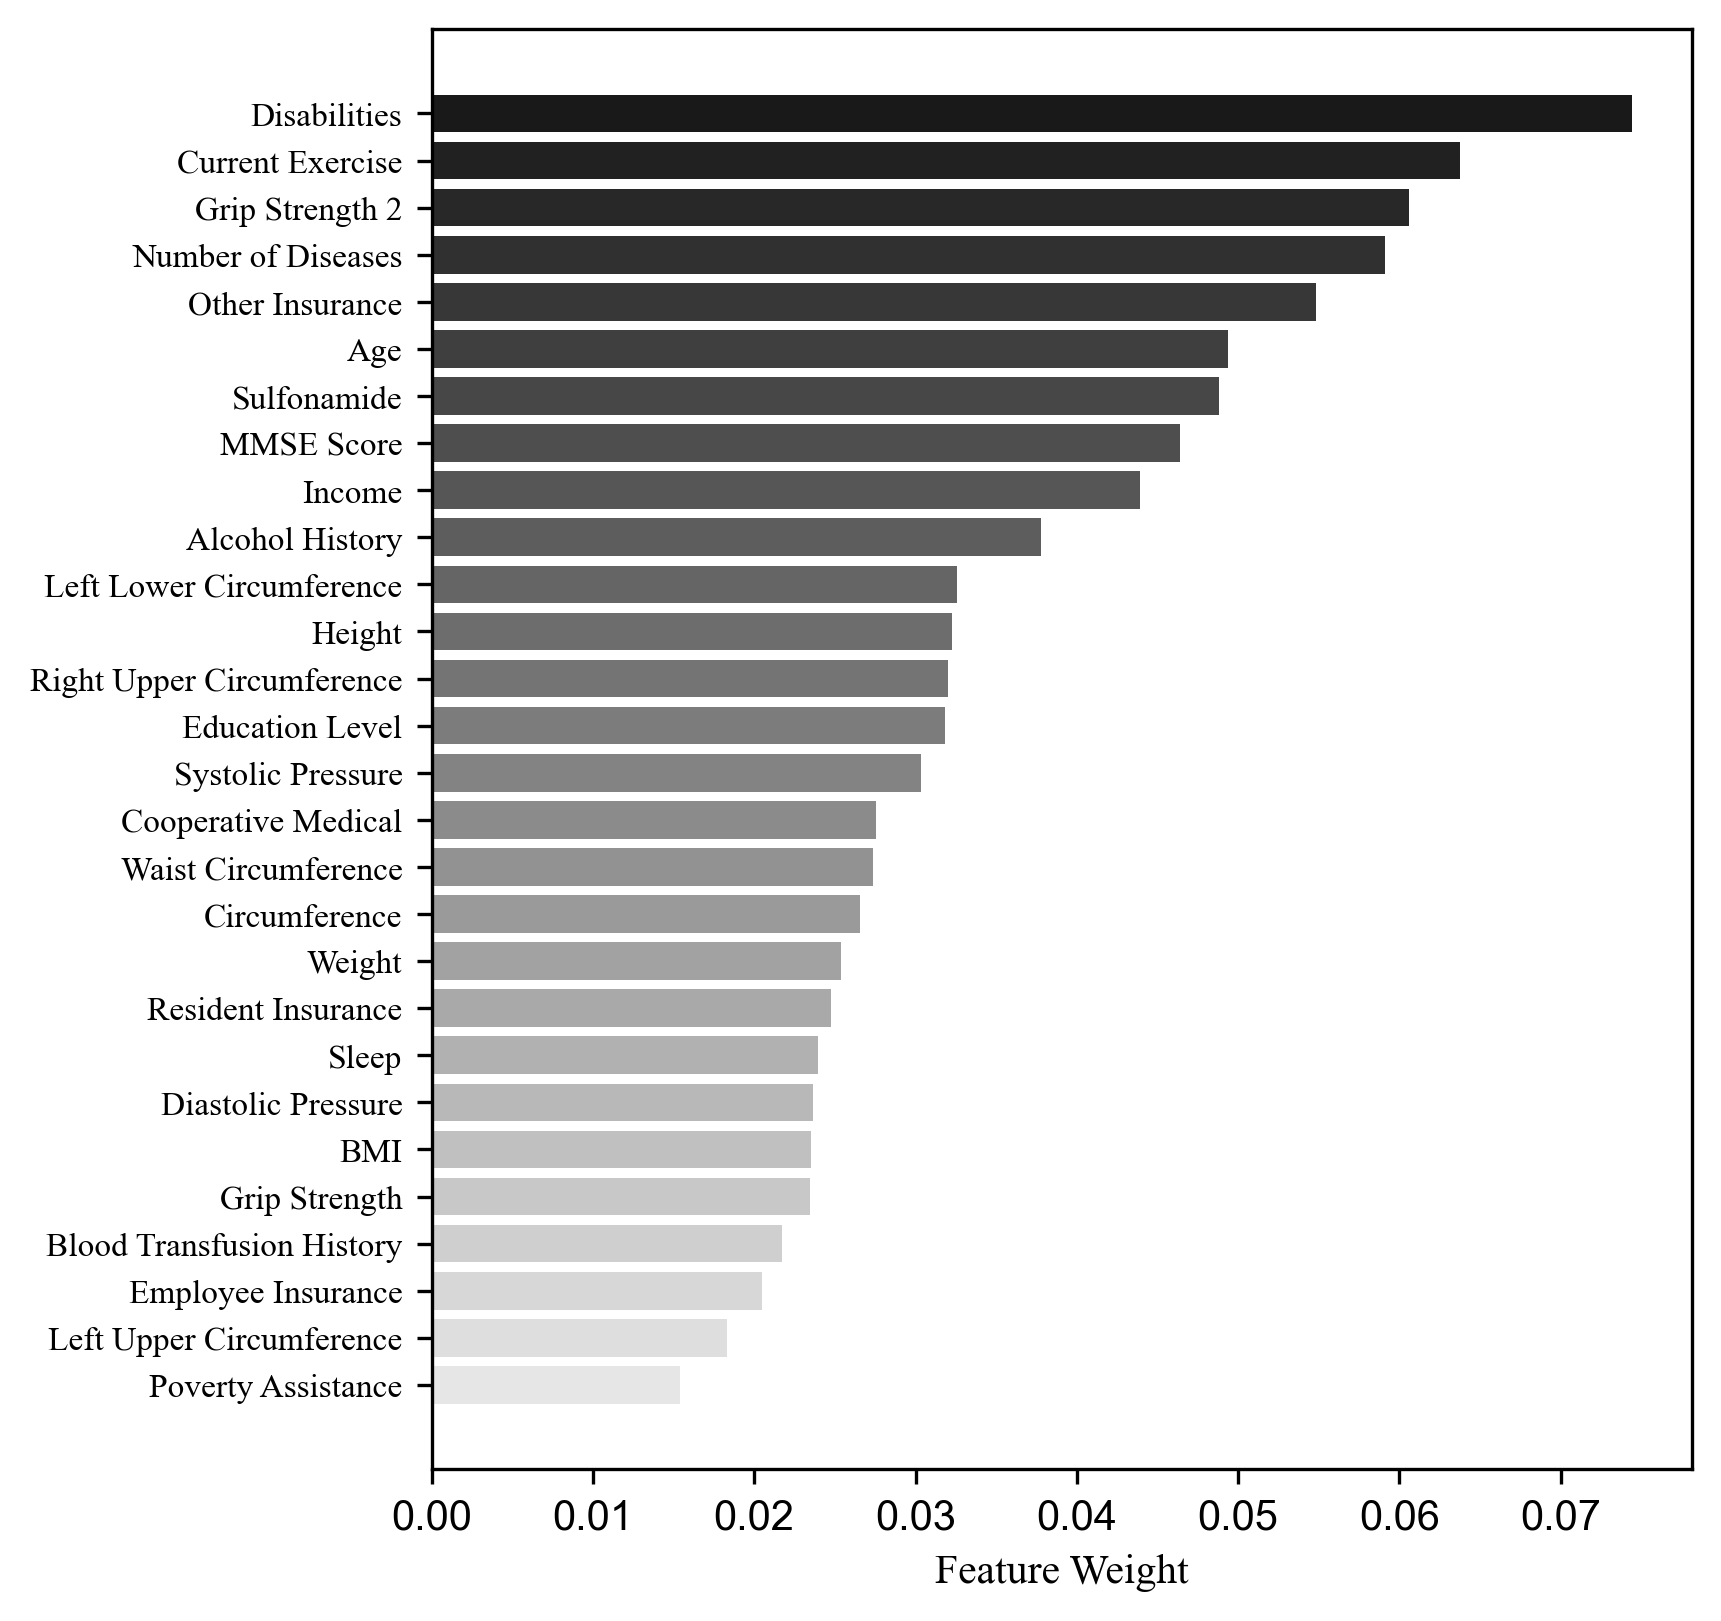

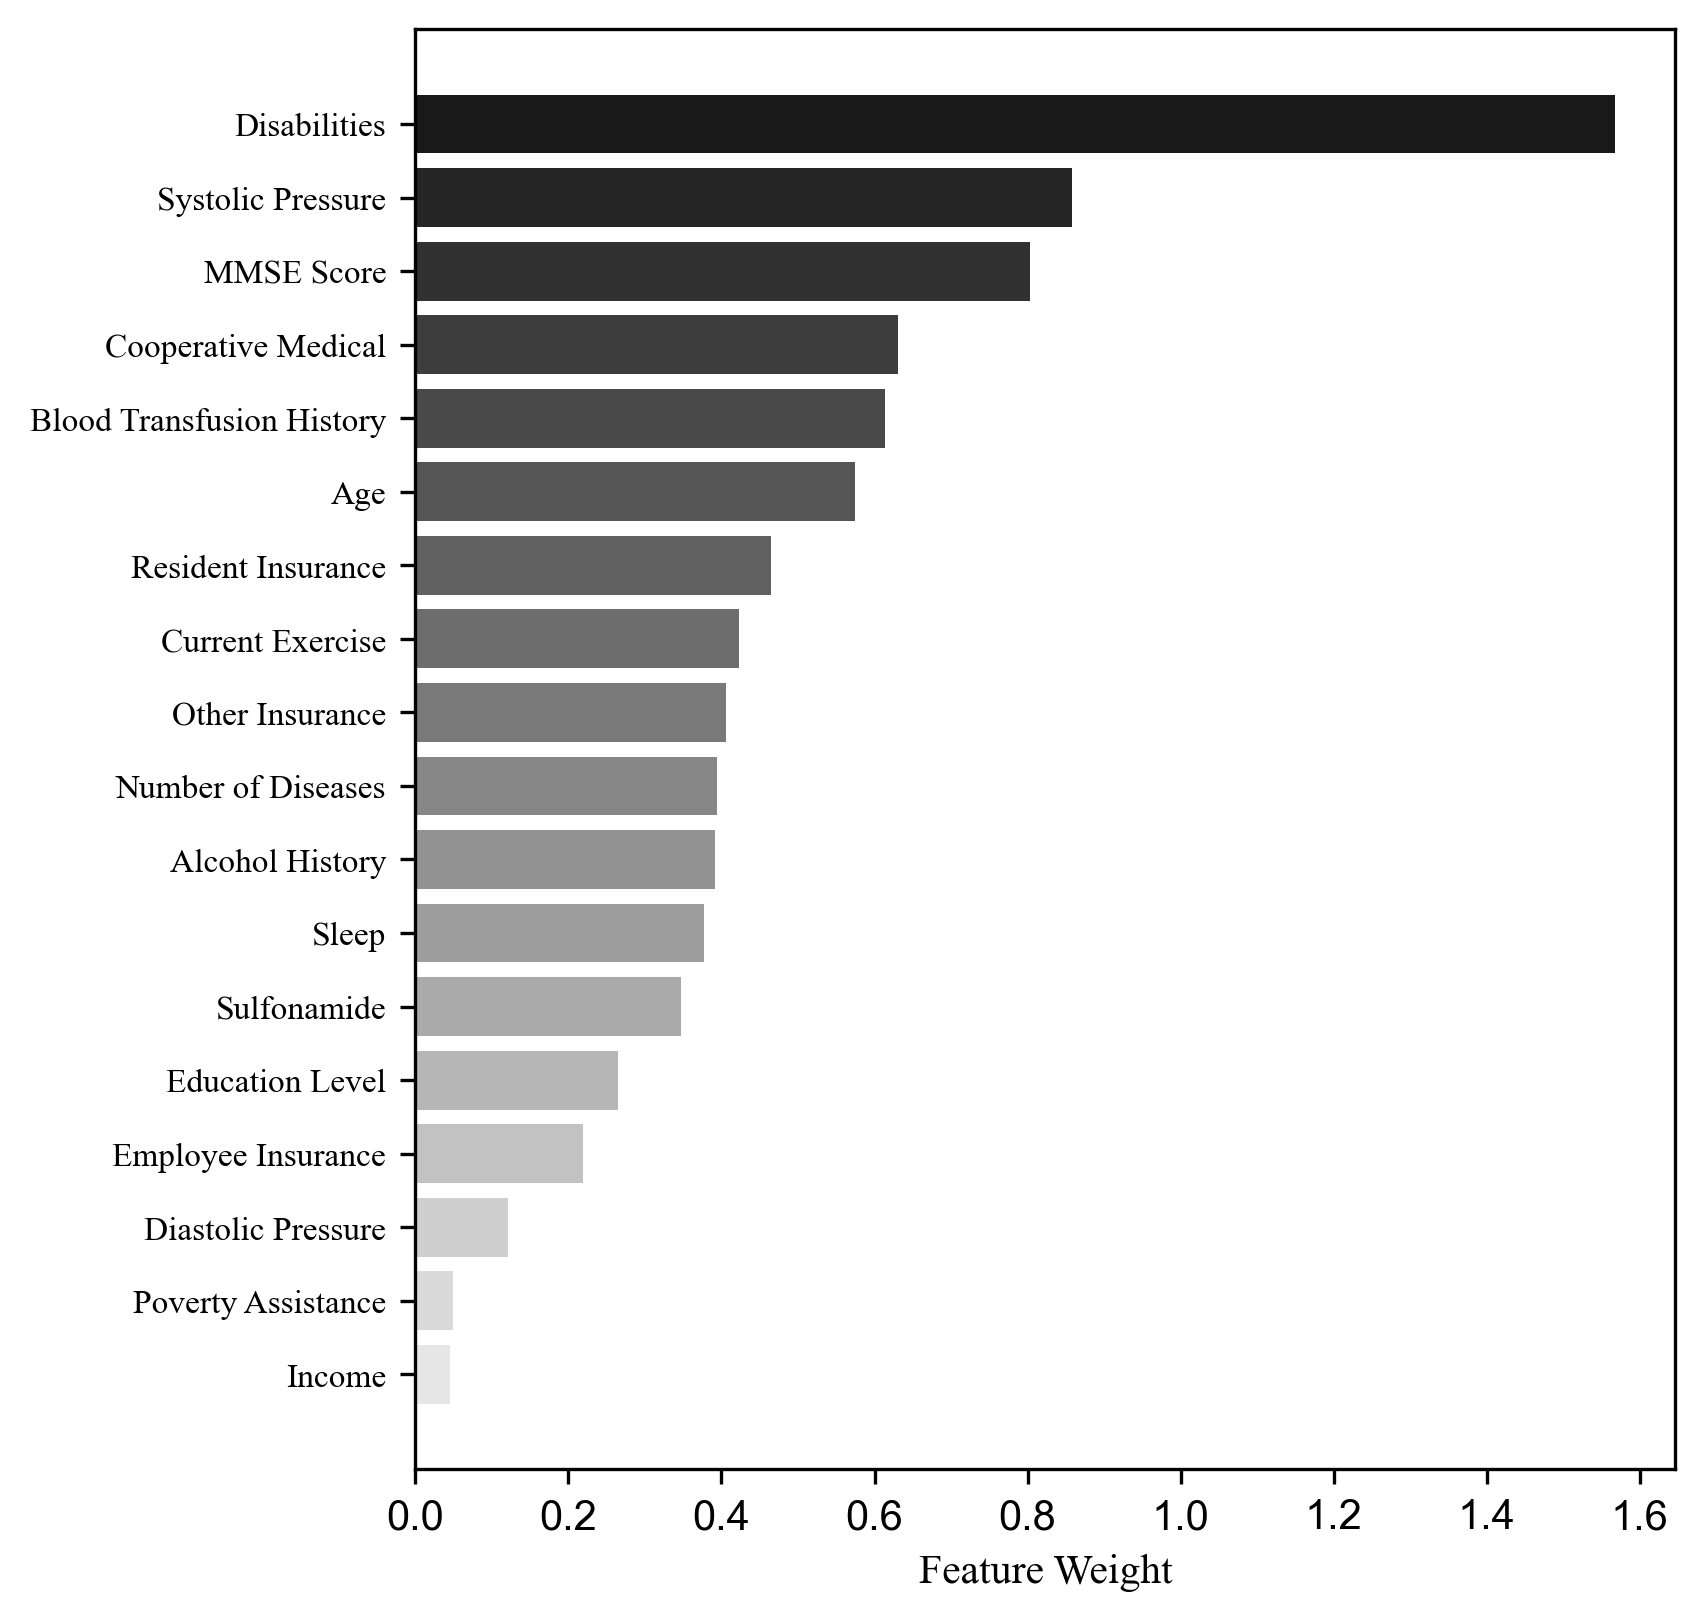

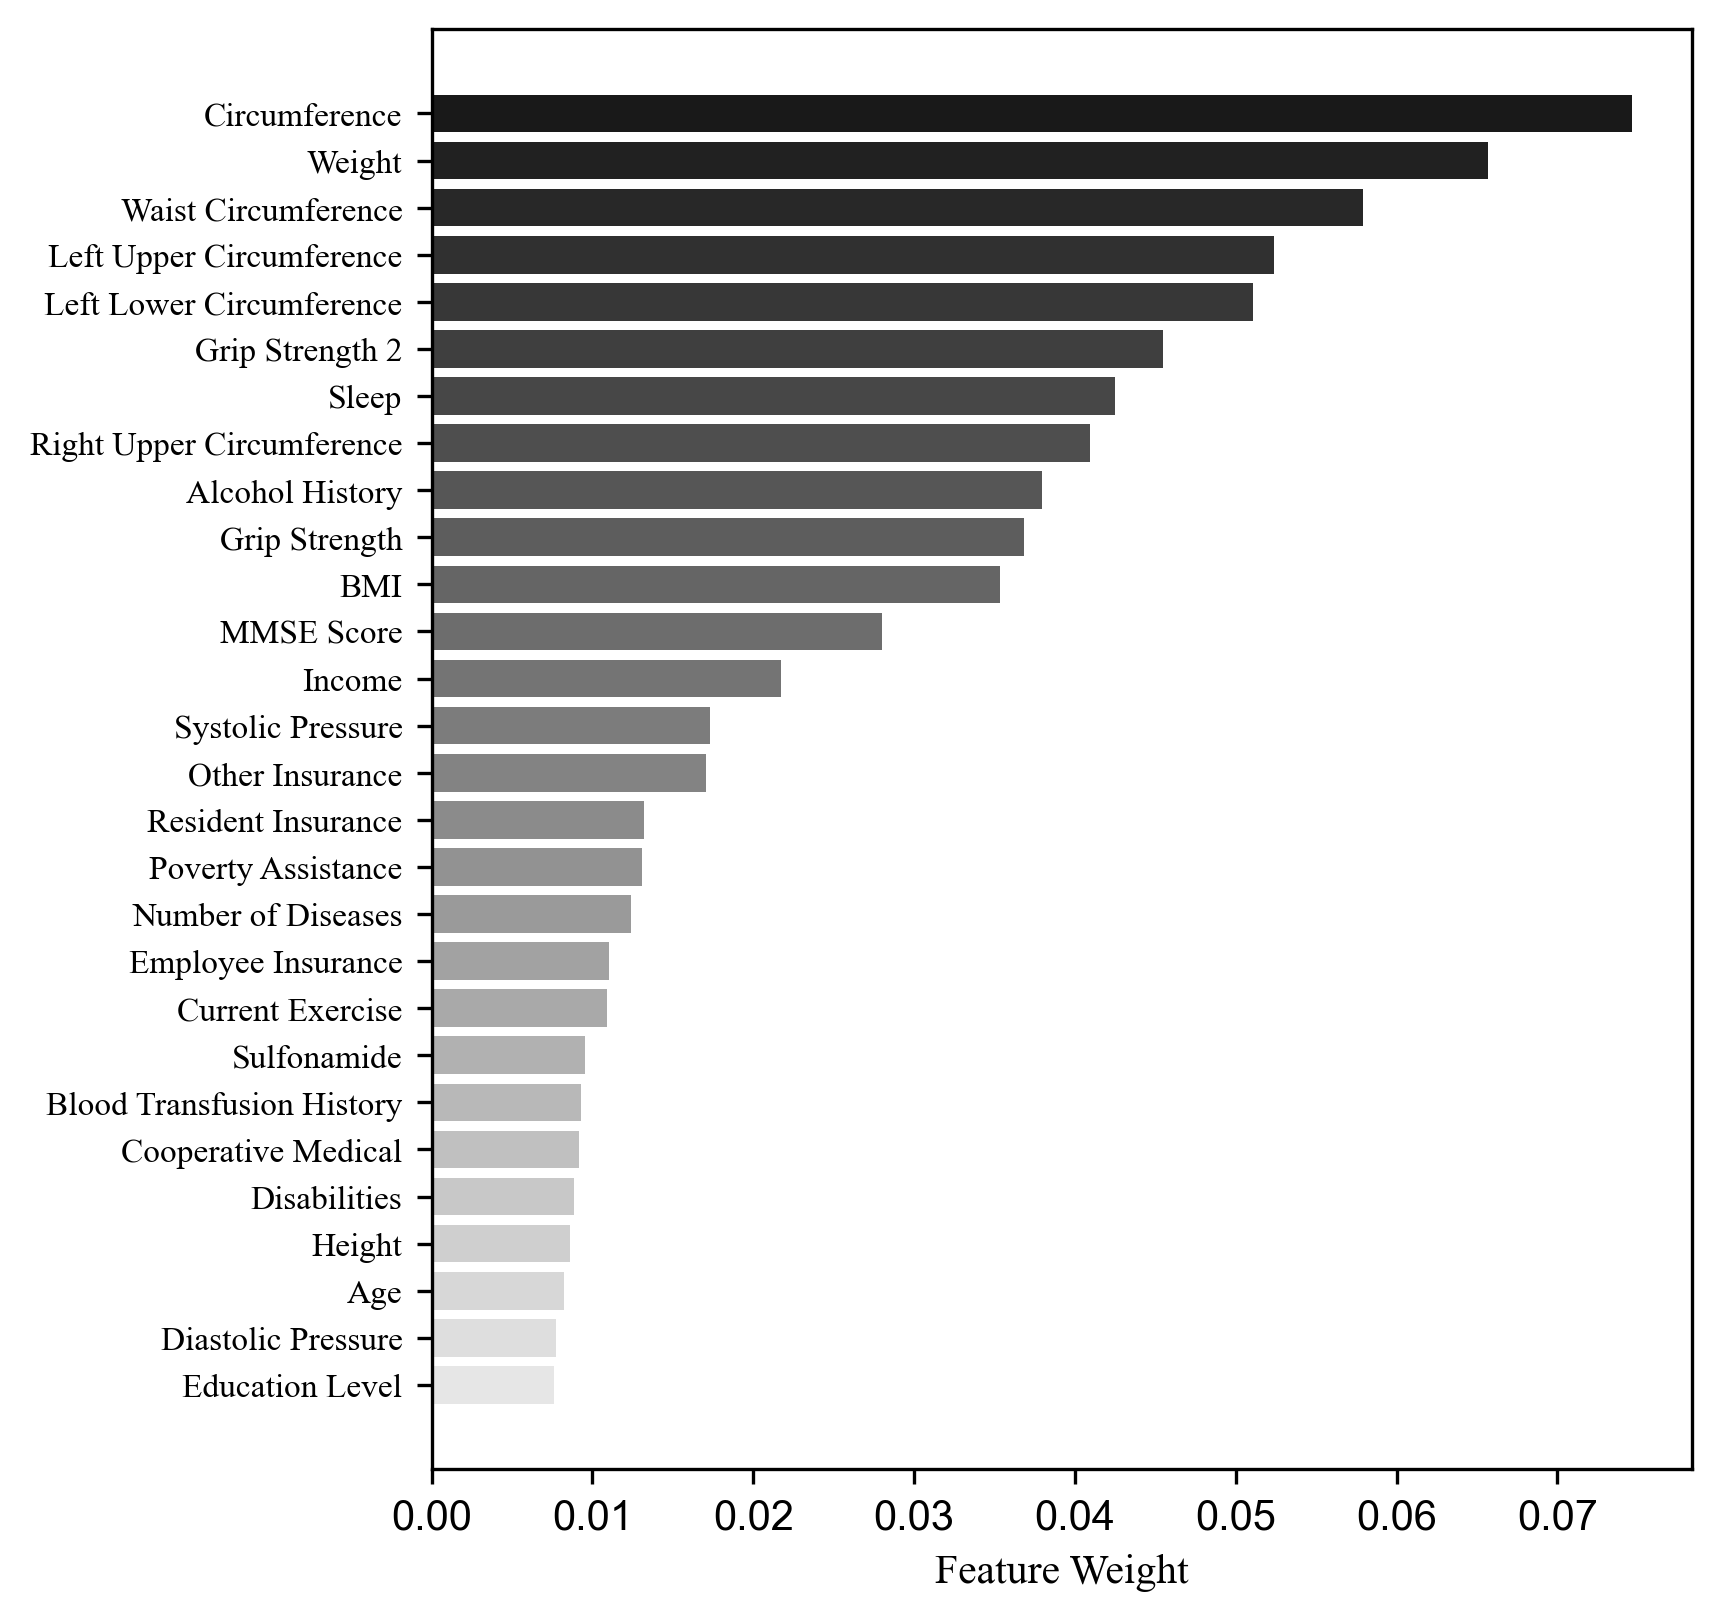

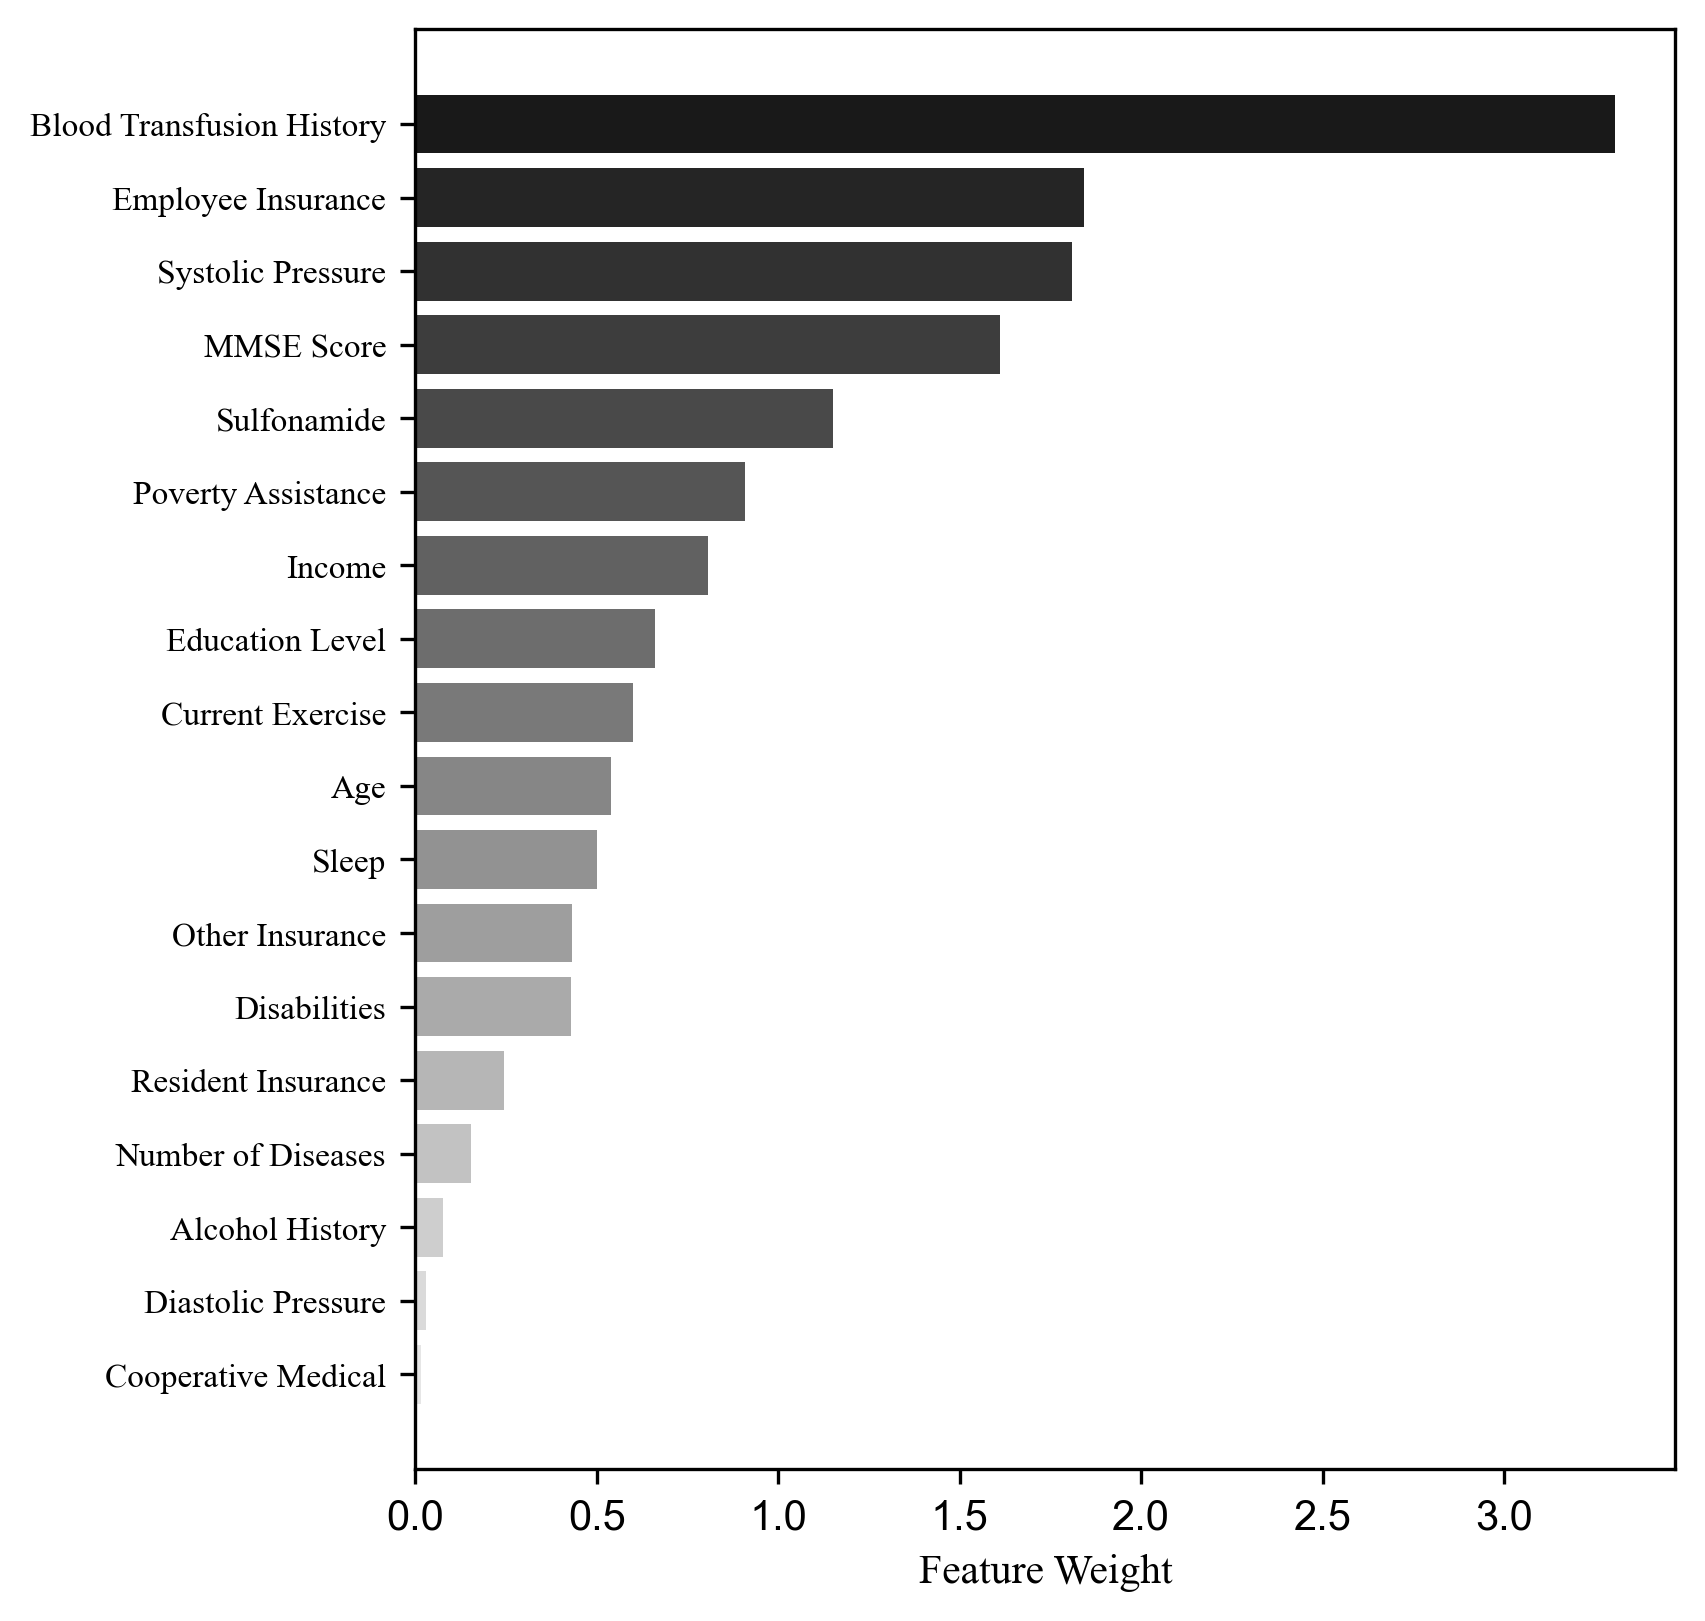

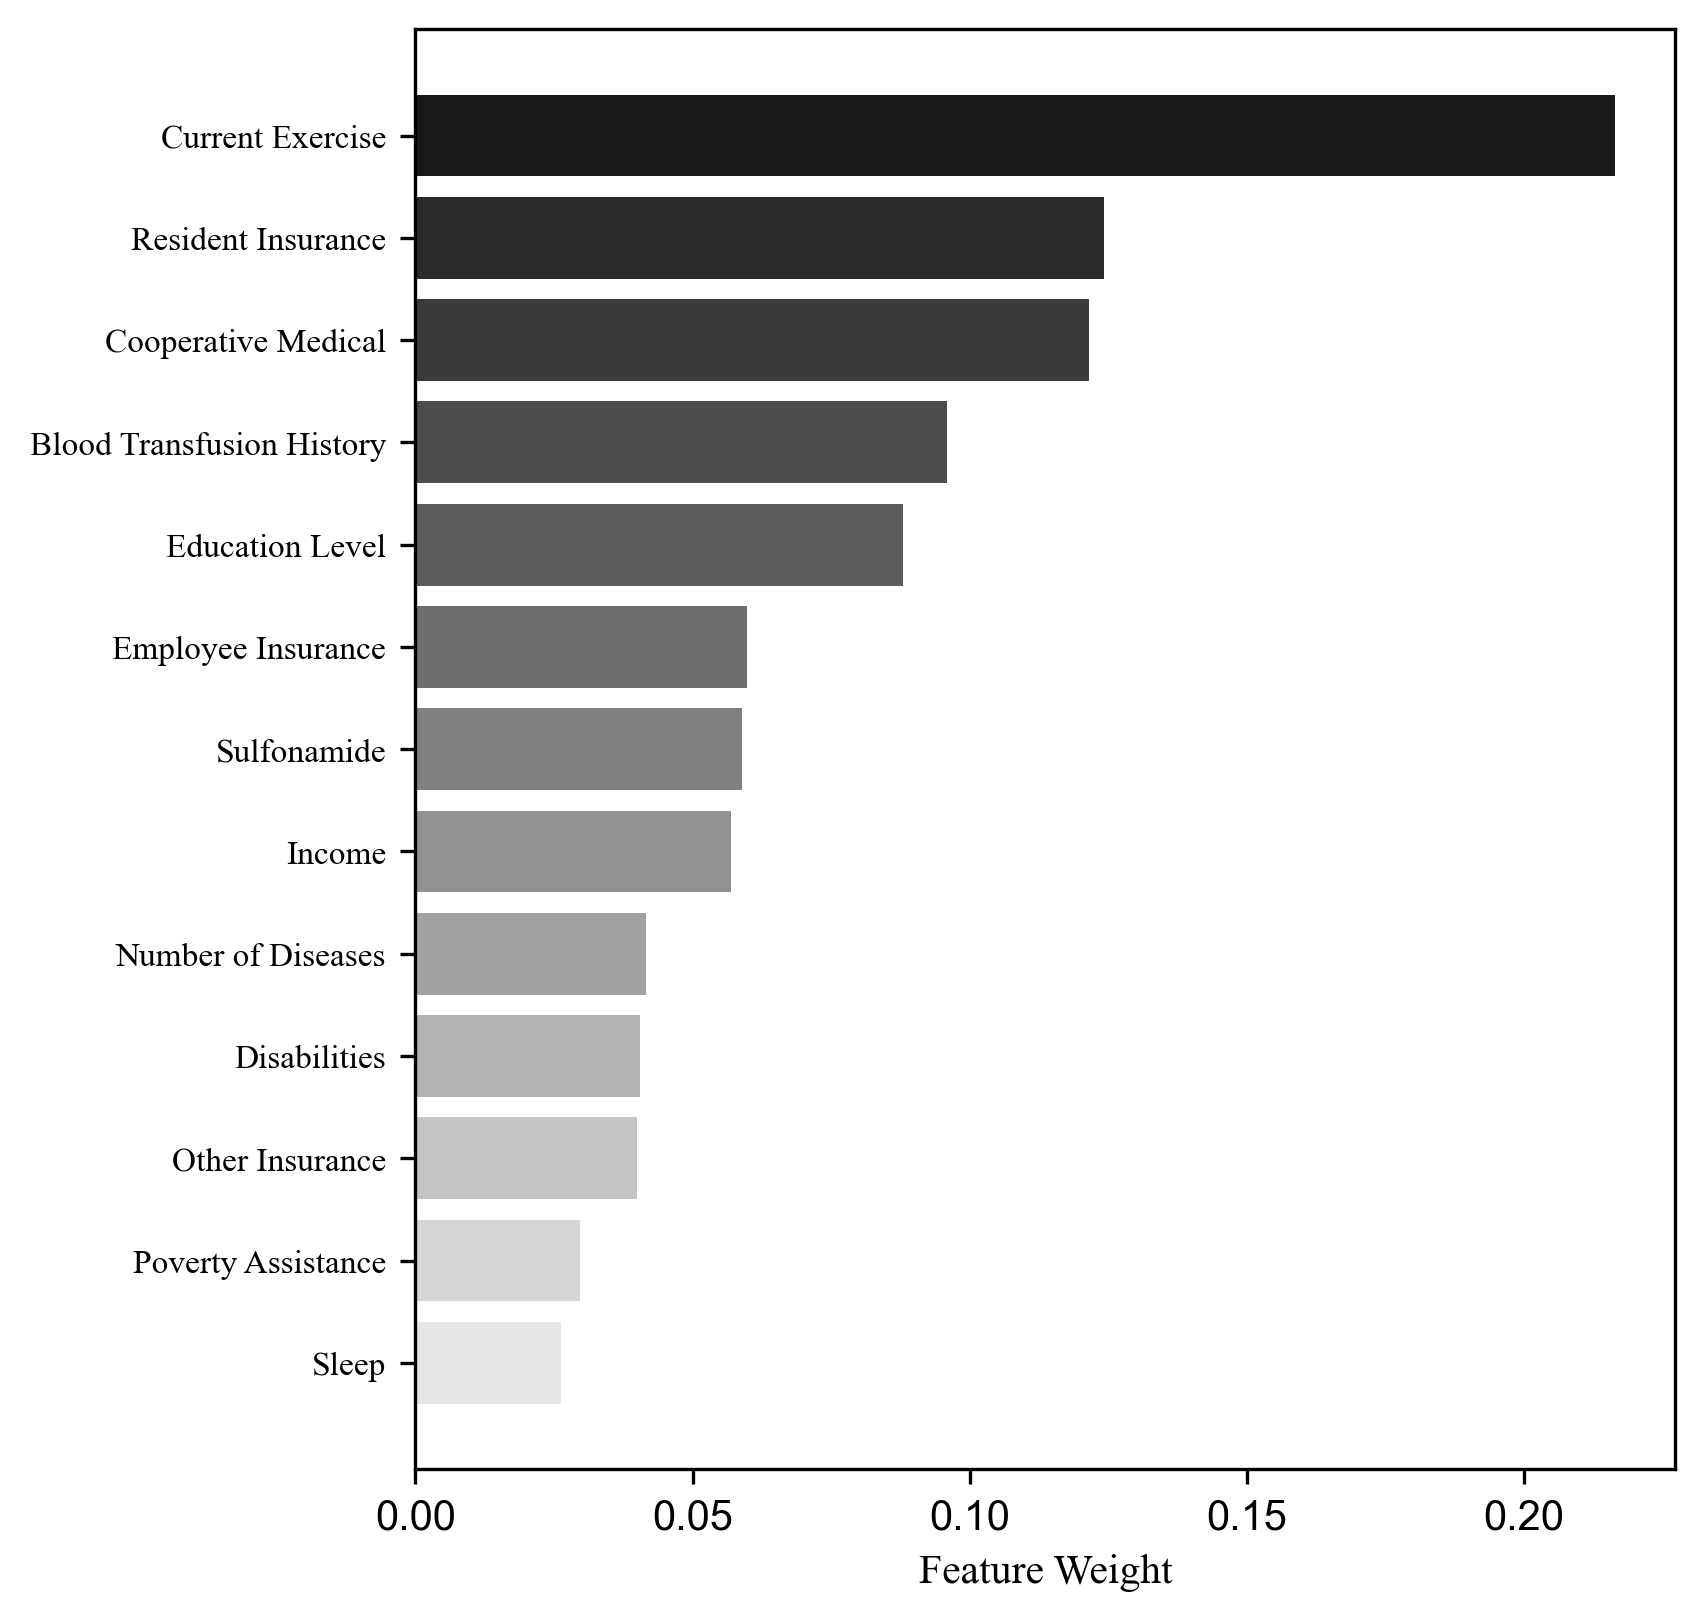

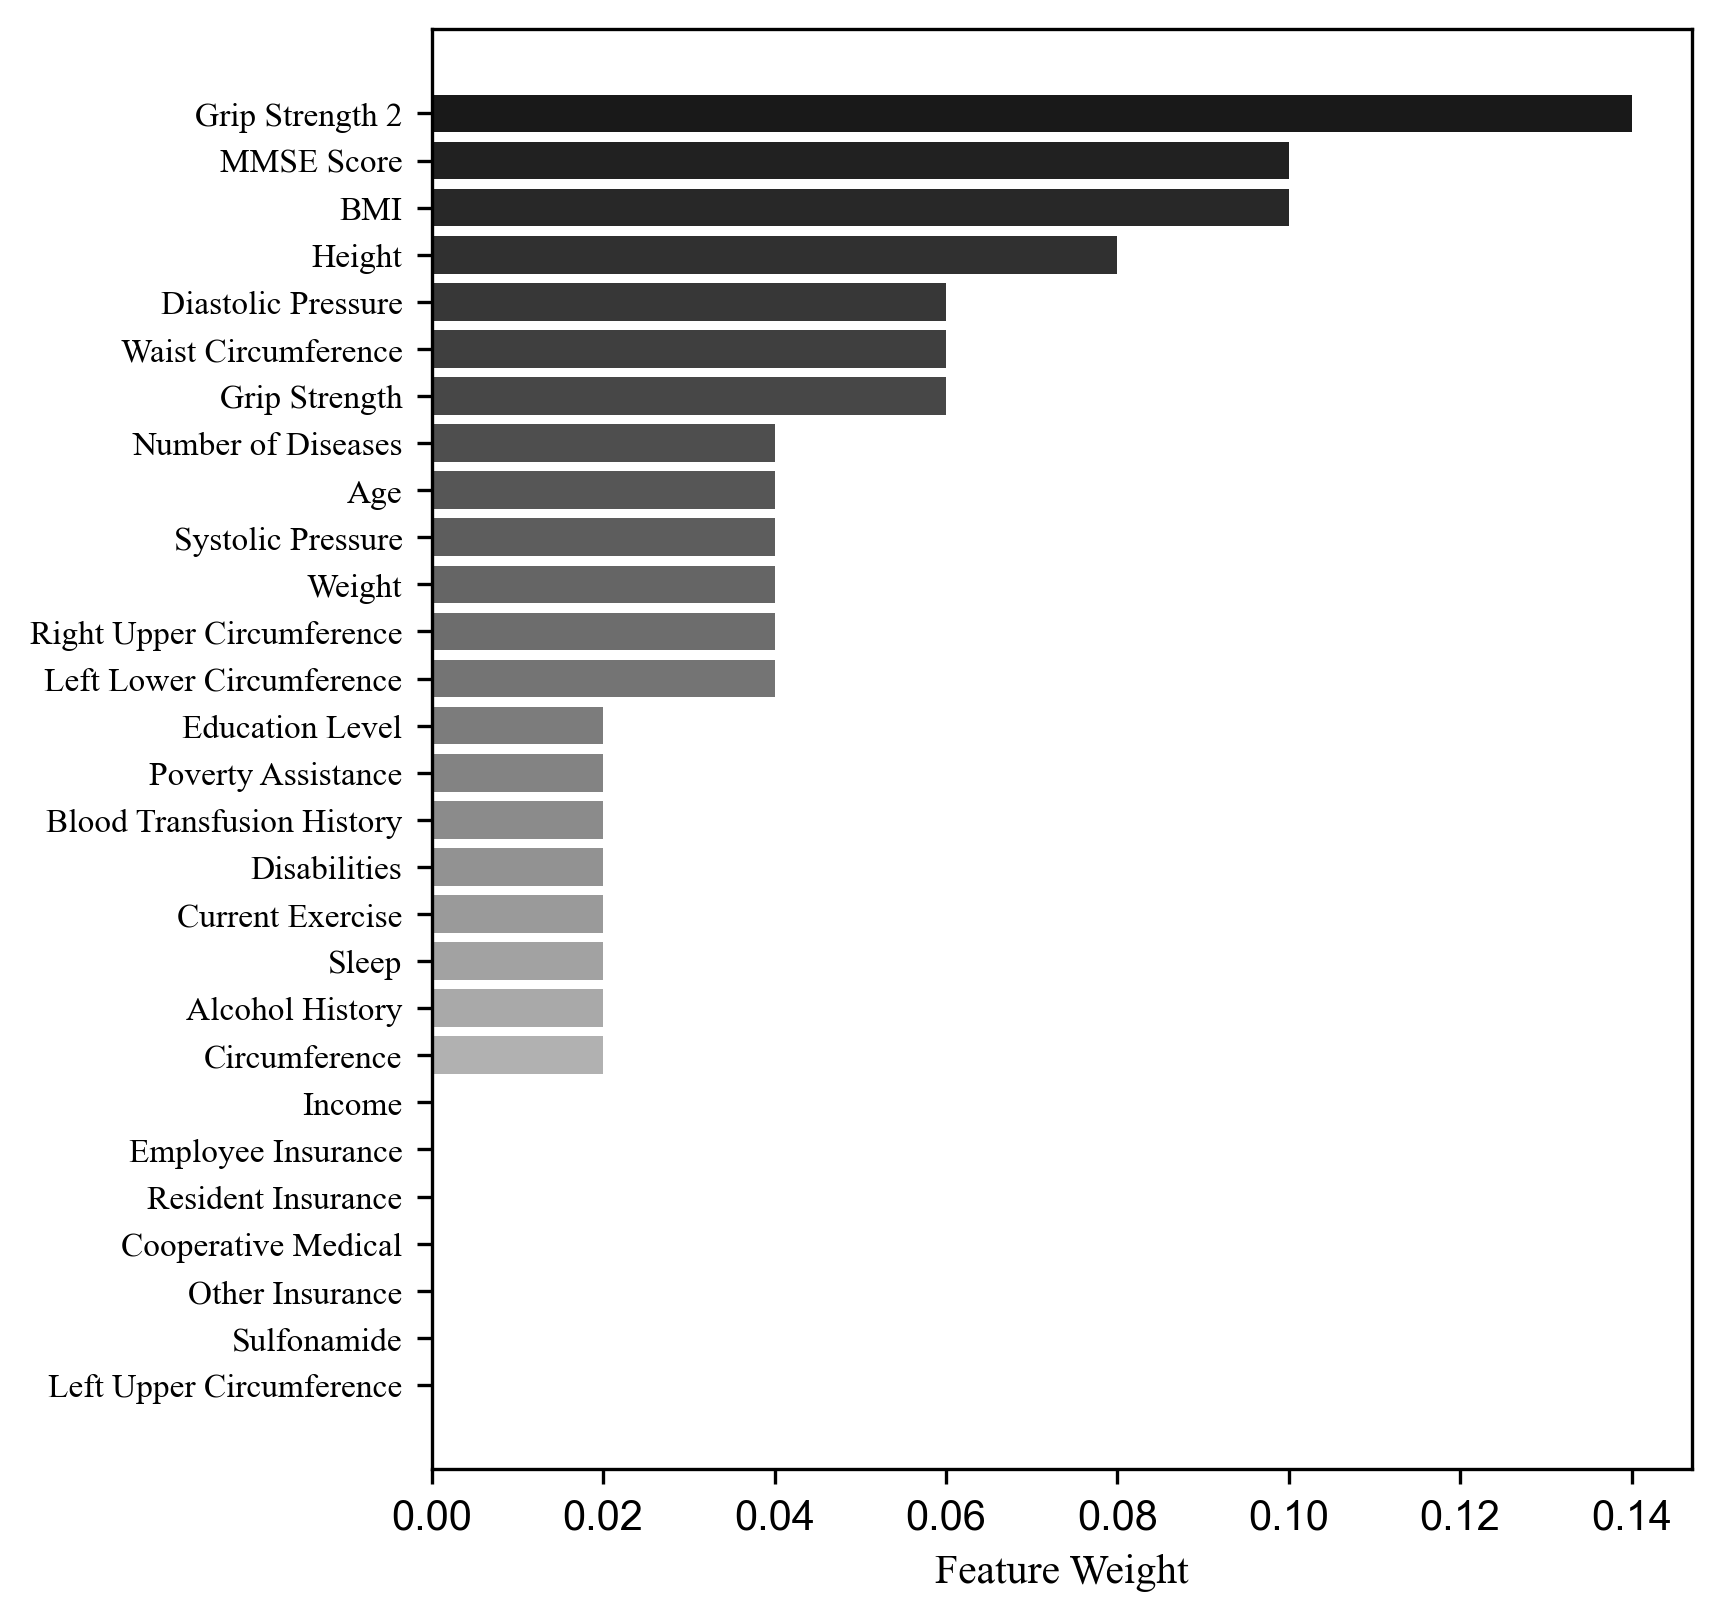

In [73]:
import matplotlib.pyplot as plt
import numpy as np
for feature_importance, name in zip(feature_importance_list, use_models_names):
    # 创建柱状图
    plt.figure(figsize=(6, 6), dpi=300)
    # 生成灰色渐变色
    n = len(feature_importance)
    colors = plt.cm.gray(np.linspace(0.1, 0.9, n))

    # 绘制特征权重条形图
    ax = plt.gca()
    plt.barh(feature_importance['feature'], feature_importance['importance'], color=colors)
    plt.xlabel('Feature Weight', fontdict={'family': 'Times New Roman'})
    plt.yticks(fontname='Times New Roman', fontsize=8)
    plt.gca().invert_yaxis()  # 反转y轴，以便高权重特征在顶部

    # 调整左边距
    ax.set_position([0.2, 0.1, 0.7, 0.8])  # 调整左边距来留出空间显示y刻度轴特征名字

    # 保存图像
    plt.savefig(f"C:\\Users\\10634\\Desktop\\frailty\\英文\\汉族\\image\\{name}_权重系数图.png")


In [56]:
feature_importance_list[1]

,feature,importance
0,Education Level,"[0.1805108042135944, 0.17610224970301228, 0.39..."


### 同时绘制roc和feature

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score

# 两个数据框的特征选择结果
features_selected_mon = []  # 蒙族特征选择结果列表
features_selected_han = []  # 汉族特征选择结果列表

# 不同分类器
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression()
}

# 使用RFECV算法进行特征选择
for name, clf in classifiers.items():
    # 特征选择蒙族数据
    rfe_mon = RFECV(clf, cv=3)
    rfe_mon.fit(X_mon, y_mon)
    features_selected_mon.append(rfe_mon.support_)
    
    # 特征选择汉族数据
    rfe_han = RFECV(clf, cv=3)
    rfe_han.fit(X_han, y_han)
    features_selected_han.append(rfe_han.support_)

# 计算特征选择结果之间的差异
jaccard_diff = []
for i in range(len(classifiers)):
    for j in range(i + 1, len(classifiers)):
        jaccard_diff.append(jaccard_score(features_selected_mon[i], features_selected_mon[j]))
        jaccard_diff.append(jaccard_score(features_selected_han[i], features_selected_han[j]))

# 创建特征差异对比图
plt.figure(figsize=(10, 6))
plt.imshow(np.array(jaccard_diff).reshape(len(classifiers), len(classifiers)), cmap='YlGnBu')
plt.colorbar()
plt.xticks(range(len(classifiers), classifiers.keys(), rotation=45))
plt.yticks(range(len(classifiers), classifiers.keys()))
plt.title("Feature Selection Difference Comparison")
plt.show()



# 将汉族样本量压缩至与蒙族相等

## 重采样前

### 读取数据

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json
h_df = pd.read_csv("C:\\Users\\10634\Desktop\\frailty\\英文\\汉族填补后数据.csv",encoding='utf-8-sig')
m_df = pd.read_csv("C:\\Users\\10634\Desktop\\frailty\\英文\\蒙族填补后数据.csv",encoding='utf-8-sig')
h_df = h_df[m_df.columns]
mongolian_sample_size = len(m_df)
h_df = h_df.sample(n=mongolian_sample_size, random_state=42)
feature_info = json.load(open('C:\\Users\\10634\\Desktop\\frailty\\feature_info.json','r',encoding='utf-8'))
# 中文
chinese_class_feature = list(feature_info['class_feature'].keys())
chinese_numeric_feature = list(feature_info['numeric_feature'].keys())
chinese_del_feature = list(feature_info['del_feature'].keys())
# 英文
english_class_feature = list(feature_info['class_feature'].values())
english_numeric_feature = list(feature_info['numeric_feature'].values())
english_del_feature = list(feature_info['del_feature'].values())


# 将分类特征都分到左边，将连续型数据都分到右边，方便处理
h_class = h_df[[i for i in h_df.columns if i in english_class_feature]]
for i in h_class.columns:
    h_class[i] = h_class[i].astype('int')
h_numeric = h_df[[i for i in h_df.columns if i in english_numeric_feature]]
for i in h_numeric.columns:
    h_numeric[i] = h_numeric[i].astype('float')
h_df = pd.concat([h_class,h_numeric],axis=1)

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
h_numeric = s.fit_transform(h_numeric)
h_scaler = pd.concat([pd.DataFrame(np.array(h_class)),pd.DataFrame(h_numeric)],axis=1)
h_scaler.columns = h_df.columns

from sklearn.model_selection import train_test_split
hy,hx = h_scaler['Frailty'],h_scaler[[col for col in h_scaler.columns if col != 'Frailty']]
hxtrain,hxtest,hytrain,hytest = train_test_split(hx,hy,test_size=0.2)

C:\Users\10634\AppData\Local\Temp\ipykernel_8652\2852994016.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_class[i] = h_class[i].astype('int')
C:\Users\10634\AppData\Local\Temp\ipykernel_8652\2852994016.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_class[i] = h_class[i].astype('int')
C:\Users\10634\AppData\Local\Temp\ipykernel_8652\2852994016.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [90]:
h_df['Frailty'].value_counts()

Frailty
0    188
1     29
Name: count, dtype: int64

In [91]:
m_df['Frailty'].value_counts()

Frailty
0    185
1     32
Name: count, dtype: int64

### RFECV

In [92]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from xgboost import XGBClassifier as XGBC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import tqdm

xgbc = XGBC()
svc = SVC(probability=True, class_weight='balanced')
lr = LR()
knn = KNN()
rf = RF(n_estimators=100,random_state=42)
lda = LDA()
gbdt = GBDT()
ada = ADA()
nb = GNB()
models = [xgbc,svc,lr,knn,rf,lda,gbdt,ada,nb]
models_name = ['xgbc','svc','lr','knn','rf','lda','gbdt','ada','nb']
result = {}
for model,name in zip(models,models_name):
    key = name
    try:
        h_rfecv = RFECV(estimator=model,          # 学习器
                    step=5,                 # 移除特征个数
                    cv=StratifiedKFold(10),  # 交叉验证次数
                    scoring='roc_auc',     # 学习器的评价标准
                    verbose = 0,
                    n_jobs = 1,
                    ).fit(hxtrain, hytrain)
        score = h_rfecv.score(hxtest,hytest)
        hx_wrapper = h_rfecv.transform(hx)
        hx_wrapper = pd.DataFrame(hx_wrapper.copy())
        hx_wrapper.columns = h_rfecv.get_feature_names_out()
        dic = {
            "n_features":h_rfecv.n_features_,
            "score": score,
            "feature_name":h_rfecv.get_feature_names_out(),
            "x_wrapper": hx_wrapper
        }
        result[key] = dic
    except Exception as e:
        print(f'{model}出现错误,{e}')

SVC(class_weight='balanced', probability=True)出现错误,when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:

KNeighborsClassifier()出现错误,when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.
GaussianNB()出现错误,when `importance_getter=='auto'`, the underlying estimator GaussianNB should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


### 绘制ROC

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as auc
from pylab import mpl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix as CM
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss

xgbc = XGBC()
svc = SVC(probability=True, class_weight='balanced',kernel='linear')
lr = LR()
knn = KNN()
rf = RF(n_estimators=100,random_state=42)
lda = LDA()
gbdt = GBDT()
ada = ADA()
nb = GNB()
use_models = [xgbc,lr,rf,lda,gbdt,ada]
use_models_names = list(result.keys())
feature_importance_list = []
for model,name in zip(use_models,use_models_names):
    hxtrain,hxtest,hytrain,hytest = train_test_split(result[name]['x_wrapper'],hy,test_size=0.2)
    model = model.fit(hxtrain,hytrain)
    if name == 'lr' or name == 'lda':
        feature_importance = sorted(list([*zip(hx_wrapper.columns,abs(model.coef_.reshape(-1,)))]),key=lambda x: x[1],reverse=True)
    else:
        feature_importance = sorted(list([*zip(hx_wrapper.columns,model.feature_importances_)]),key=lambda x: x[1],reverse=True)
    feature_importance = pd.DataFrame(feature_importance)
    feature_importance.columns = ['feature','importance']
    feature_importance_list.append(feature_importance)
    y_pre = model.predict(hxtest)
    y_all_prob, y_pos_prob = model.predict_proba(hxtest), model.predict_proba(hxtest)[:,1]
    # save_path = f"C:\\Users\\10634\\Desktop\\frailty\\英文\\汉族\\image\\roc_new\\{name}_roc.png"
    # plot_roc(hytest,y_pos_prob,y_all_prob,save_path)
    # plt.close()

d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
feature_importance_list[0]

,feature,importance
0,Education Level,0.176469
1,Employee Insurance,0.112585
2,Cognitive,0.100135
3,Family Structure,0.094375
4,Diabetes,0.089902
5,Gender,0.080690
6,Number of Diseases,0.063064
7,Income,0.060852
8,Resident Insurance,0.059442
9,Occupation,0.049663


### 绘制特征权重

In [15]:
import matplotlib.pyplot as plt
import numpy as np
for feature_importance, name in zip(feature_importance_list, use_models_names):
    # 创建柱状图
    plt.figure(figsize=(6, 6), dpi=300)
    # 生成灰色渐变色
    n = len(feature_importance)
    colors = plt.cm.gray(np.linspace(0.1, 0.9, n))

    # 绘制特征权重条形图
    ax = plt.gca()
    plt.barh(feature_importance['feature'], feature_importance['importance'], color=colors)
    plt.xlabel('Feature Weight', fontdict={'family': 'Times New Roman'})
    plt.yticks(fontname='Times New Roman', fontsize=8)
    plt.gca().invert_yaxis()  # 反转y轴，以便高权重特征在顶部

    # 调整左边距
    ax.set_position([0.2, 0.1, 0.7, 0.8])  # 调整左边距来留出空间显示y刻度轴特征名字

    # 保存图像
    # plt.savefig(f"C:\\Users\\10634\\Desktop\\frailty\\英文\\汉族\\image\\feature_importance_new\\{name}_权重系数图.png")
    plt.close()


## 重采样后

### SMOTE重采样

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json
h_df = pd.read_csv("C:\\Users\\10634\Desktop\\frailty\\英文\\汉族填补后数据.csv",encoding='utf-8-sig')
m_df = pd.read_csv("C:\\Users\\10634\Desktop\\frailty\\英文\\蒙族填补后数据.csv",encoding='utf-8-sig')
h_df = h_df[m_df.columns]
mongolian_sample_size = len(m_df)
h_df = h_df.sample(n=mongolian_sample_size, random_state=42)
feature_info = json.load(open('C:\\Users\\10634\\Desktop\\frailty\\feature_info.json','r',encoding='utf-8'))
# 中文
chinese_class_feature = list(feature_info['class_feature'].keys())
chinese_numeric_feature = list(feature_info['numeric_feature'].keys())
chinese_del_feature = list(feature_info['del_feature'].keys())
# 英文
english_class_feature = list(feature_info['class_feature'].values())
english_numeric_feature = list(feature_info['numeric_feature'].values())
english_del_feature = list(feature_info['del_feature'].values())


# 将分类特征都分到左边，将连续型数据都分到右边，方便处理
h_class = h_df[[i for i in h_df.columns if i in english_class_feature]]
for i in h_class.columns:
    h_class[i] = h_class[i].astype('int')
h_numeric = h_df[[i for i in h_df.columns if i in english_numeric_feature]]
for i in h_numeric.columns:
    h_numeric[i] = h_numeric[i].astype('float')
h_df = pd.concat([h_class,h_numeric],axis=1)

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
h_numeric = s.fit_transform(h_numeric)
h_scaler = pd.concat([pd.DataFrame(np.array(h_class)),pd.DataFrame(h_numeric)],axis=1)
h_scaler.columns = h_df.columns

from sklearn.model_selection import train_test_split
hy,hx = h_scaler['Frailty'],h_scaler[[col for col in h_scaler.columns if col != 'Frailty']]
hxtrain,hxtest,hytrain,hytest = train_test_split(hx,hy,test_size=0.2)

from imblearn.over_sampling import RandomOverSampler, SMOTE
smote = SMOTE(random_state=100) 
hx_smotesampled, hy_smotesampled = smote.fit_resample(hxtrain, hytrain)

C:\Users\10634\AppData\Local\Temp\ipykernel_8652\1333811772.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_class[i] = h_class[i].astype('int')
C:\Users\10634\AppData\Local\Temp\ipykernel_8652\1333811772.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_class[i] = h_class[i].astype('int')
C:\Users\10634\AppData\Local\Temp\ipykernel_8652\1333811772.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

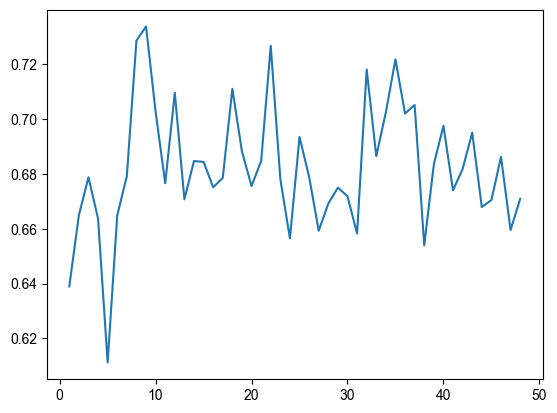

In [88]:
import numpy as np
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
score_test = []
for i in range(1, len(hx.columns)+1, 1):
    X_wrapper_rf = RFE(rf, n_features_to_select=i).fit_transform(hx, hy)
    once_rf = cross_val_score(rf, X_wrapper_rf, hy, cv=5,scoring='roc_auc').mean()
    score_test.append(once_rf)
plt.plot(range(1, len(hx.columns)+1, 1),score_test)

In [ ]:
hx_smotesampled

### RFECV

In [35]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from xgboost import XGBClassifier as XGBC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import tqdm

xgbc = XGBC()
svc = SVC(probability=True, class_weight='balanced')
lr = LR()
knn = KNN()
rf = RF(n_estimators=100,random_state=42)
lda = LDA()
gbdt = GBDT()
ada = ADA()
nb = GNB()
models = [xgbc,svc,lr,knn,rf,lda,gbdt,ada,nb]
models_name = ['xgbc','svc','lr','knn','rf','lda','gbdt','ada','nb']
result = {}
for model,name in zip(models,models_name):
    key = name
    try:
        h_rfecv = RFECV(estimator=model,          # 学习器
                    step=5,                 # 移除特征个数
                    cv=StratifiedKFold(10),  # 交叉验证次数
                    scoring='roc_auc',     # 学习器的评价标准
                    verbose = 0,
                    n_jobs = 1,
                    ).fit(hx_smotesampled, hy_smotesampled)
        score = h_rfecv.score(hxtest,hytest)
        hx_wrapper = h_rfecv.transform(hx)
        hx_wrapper = pd.DataFrame(hx_wrapper.copy())
        hx_wrapper.columns = h_rfecv.get_feature_names_out()
        dic = {
            "n_features":h_rfecv.n_features_,
            "score": score,
            "feature_name":h_rfecv.get_feature_names_out(),
            "x_wrapper": hx_wrapper
        }
        result[key] = dic
    except Exception as e:
        print(f'{model}出现错误,{e}')

SVC(class_weight='balanced', probability=True)出现错误,when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:

KNeighborsClassifier()出现错误,when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.
GaussianNB()出现错误,when `importance_getter=='auto'`, the underlying estimator GaussianNB should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


### 绘制ROC

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as auc
from pylab import mpl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix as CM
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss

xgbc = XGBC()
svc = SVC(probability=True, class_weight='balanced',kernel='linear')
lr = LR()
knn = KNN()
rf = RF(n_estimators=100,random_state=42)
lda = LDA()
gbdt = GBDT()
ada = ADA()
nb = GNB()
use_models = [xgbc,lr,rf,lda,gbdt,ada]
use_models_names = list(result.keys())
feature_importance_list = []
for model,name in zip(use_models,use_models_names):
    hxtrain,hxtest,hytrain,hytest = train_test_split(result[name]['x_wrapper'],hy,test_size=0.2,random_state=42)
    print(hxtrain.shape,hxtest.shape,hytrain.shape,hytest.shape ,'---',Counter(hytrain))
    smote = SMOTE(random_state=100) 
    hx_smotesampled, hy_smotesampled = smote.fit_resample(hxtrain, hytrain)
    print(hx_smotesampled.shape,hxtest.shape,hy_smotesampled.shape,hytest.shape ,'---',Counter(hy_smotesampled))
    model = model.fit(hx_smotesampled,hy_smotesampled)
    if name == 'lr' or name == 'lda':
        feature_importance = sorted(list([*zip(hx_wrapper.columns,abs(model.coef_.reshape(-1,)))]),key=lambda x: x[1],reverse=True)
    else:
        feature_importance = sorted(list([*zip(hx_wrapper.columns,model.feature_importances_)]),key=lambda x: x[1],reverse=True)
    feature_importance = pd.DataFrame(feature_importance)
    feature_importance.columns = ['feature','importance']
    feature_importance_list.append(feature_importance)
    y_pre = model.predict(hxtest)
    y_all_prob, y_pos_prob = model.predict_proba(hxtest), model.predict_proba(hxtest)[:,1]
    save_path = f"C:\\Users\\10634\\Desktop\\frailty\\英文\\汉族\\image\\roc_smote\\{name}_roc.png"
    plot_roc(hytest,y_pos_prob,y_all_prob,save_path)
    plt.close()

(173, 28) (44, 28) (173,) (44,) --- Counter({0: 147, 1: 26})
(294, 28) (44, 28) (294,) (44,) --- Counter({0: 147, 1: 147})
(173, 48) (44, 48) (173,) (44,) --- Counter({0: 147, 1: 26})
(294, 48) (44, 48) (294,) (44,) --- Counter({0: 147, 1: 147})


d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(173, 33) (44, 33) (173,) (44,) --- Counter({0: 147, 1: 26})
(294, 33) (44, 33) (294,) (44,) --- Counter({0: 147, 1: 147})
(173, 48) (44, 48) (173,) (44,) --- Counter({0: 147, 1: 26})
(294, 48) (44, 48) (294,) (44,) --- Counter({0: 147, 1: 147})
(173, 33) (44, 33) (173,) (44,) --- Counter({0: 147, 1: 26})
(294, 33) (44, 33) (294,) (44,) --- Counter({0: 147, 1: 147})
(173, 23) (44, 23) (173,) (44,) --- Counter({0: 147, 1: 26})
(294, 23) (44, 23) (294,) (44,) --- Counter({0: 147, 1: 147})


,Gender,Education Level,Occupation,Family Structure,Income,Employee Insurance,Resident Insurance,Other Insurance,Coronary Heart Disease,Number of Diseases,...,MMSE Score,Systolic Pressure,Diastolic Pressure,Height,Weight,Waist Circumference,BMI,Grip Strength,Left Upper Circumference,Left Lower Circumference
80,2.0,8.0,7.0,1.0,3.0,1.0,1.0,2.0,1.0,0.0,...,0.638406,1.075926,-0.183677,-0.118221,-0.501954,-0.807551,-0.159755,-0.071462,-0.163072,0.646453
103,2.0,9.0,7.0,1.0,3.0,2.0,1.0,2.0,1.0,0.0,...,-2.445400,-0.875806,-0.183677,-0.362081,-1.328702,0.362834,-0.213460,-0.376807,-0.163072,-0.783155
89,2.0,6.0,7.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,...,0.163974,0.685579,0.253122,0.198796,1.254886,0.682030,-0.320870,1.128109,-0.473482,0.289051
36,2.0,9.0,7.0,3.0,4.0,2.0,1.0,2.0,2.0,5.0,...,0.401190,1.466272,0.253122,-0.215765,0.634825,1.533218,1.424550,-1.031118,2.009794,0.825154
22,1.0,7.0,7.0,2.0,3.0,1.0,2.0,2.0,1.0,0.0,...,0.401190,0.587993,0.253122,0.101252,-0.605298,-1.445942,-0.643102,0.517419,-0.783891,0.110350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,2.0,9.0,7.0,3.0,2.0,1.0,1.0,2.0,2.0,3.0,...,-2.682616,0.392820,-0.271037,-0.264537,-0.915328,-0.275558,-0.106049,-0.311376,0.457747,-0.783155
211,2.0,9.0,7.0,1.0,4.0,2.0,1.0,2.0,2.0,3.0,...,-0.784889,0.587993,-0.511276,-0.215765,0.428137,0.575631,1.182877,0.648281,0.768156,1.539958
154,2.0,9.0,7.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,...,-0.073242,-0.875806,-0.489436,14.440181,-0.398611,0.894827,0.216182,-0.638532,-0.163072,-1.319258
127,2.0,9.0,7.0,1.0,1.0,2.0,1.0,2.0,1.0,0.0,...,0.875622,0.100060,0.034722,-0.093835,-0.088580,-0.701152,0.189330,-0.518574,0.147337,0.825154


# 蒙族

## 读取数据

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json
m_df = pd.read_csv("C:\\Users\\10634\Desktop\\frailty\\英文\\蒙族填补后数据.csv",encoding='utf-8-sig')
feature_info = json.load(open('C:\\Users\\10634\\Desktop\\frailty\\feature_info.json','r',encoding='utf-8'))
# 中文
cminese_class_feature = list(feature_info['class_feature'].keys())
cminese_numeric_feature = list(feature_info['numeric_feature'].keys())
cminese_del_feature = list(feature_info['del_feature'].keys())
# 英文
english_class_feature = list(feature_info['class_feature'].values())
english_numeric_feature = list(feature_info['numeric_feature'].values())
english_del_feature = list(feature_info['del_feature'].values())


# 将分类特征都分到左边，将连续型数据都分到右边，方便处理
m_class = m_df[[i for i in m_df.columns if i in english_class_feature]]
for i in m_class.columns:
    m_class[i] = m_class[i].astype('int')
m_numeric = m_df[[i for i in m_df.columns if i in english_numeric_feature]]
for i in m_numeric.columns:
    m_numeric[i] = m_numeric[i].astype('float')
m_df = pd.concat([m_class,m_numeric],axis=1)

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
m_numeric = s.fit_transform(m_numeric)
m_scaler = pd.concat([pd.DataFrame(np.array(m_class)),pd.DataFrame(m_numeric)],axis=1)
m_scaler.columns = m_df.columns

from sklearn.model_selection import train_test_split
my,mx = m_scaler['Frailty'],m_scaler[[col for col in m_scaler.columns if col != 'Frailty']]
mxtrain,mxtest,mytrain,mytest = train_test_split(mx,my,test_size=0.2)

C:\Users\10634\AppData\Local\Temp\ipykernel_8652\14451118.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_class[i] = m_class[i].astype('int')
C:\Users\10634\AppData\Local\Temp\ipykernel_8652\14451118.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_class[i] = m_class[i].astype('int')
C:\Users\10634\AppData\Local\Temp\ipykernel_8652\14451118.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



## 标准化

## RFECV

In [98]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from xgboost import XGBClassifier as XGBC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import tqdm

xgbc = XGBC()
svc = SVC(probability=True, class_weight='balanced')
lr = LR()
knn = KNN()
rf = RF(n_estimators=100,random_state=42)
lda = LDA()
gbdt = GBDT()
ada = ADA()
nb = GNB()
models = [xgbc,svc,lr,knn,rf,lda,gbdt,ada,nb]
models_name = ['xgbc','svc','lr','knn','rf','lda','gbdt','ada','nb']
result_m = {}
for model,name in zip(models,models_name):
    key = name
    try:
        m_rfecv = RFECV(estimator=model,          # 学习器
                    step=5,                 # 移除特征个数
                    cv=StratifiedKFold(10),  # 交叉验证次数
                    scoring='roc_auc',     # 学习器的评价标准
                    verbose = 0,
                    n_jobs = 1,
                    ).fit(mxtrain, mytrain)
        score = m_rfecv.score(mxtest,mytest)
        mx_wrapper = m_rfecv.transform(mx)
        mx_wrapper = pd.DataFrame(mx_wrapper.copy())
        mx_wrapper.columns = m_rfecv.get_feature_names_out()
        dic = {
            "n_features":m_rfecv.n_features_,
            "score": score,
            "feature_name":m_rfecv.get_feature_names_out(),
            "x_wrapper": mx_wrapper
        }
        result_m[key] = dic
    except Exception as e:
        print(f'{model}出现错误,{e}')

SVC(class_weight='balanced', probability=True)出现错误,when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:

KNeighborsClassifier()出现错误,when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.
GaussianNB()出现错误,when `importance_getter=='auto'`, the underlying estimator GaussianNB should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


## roc

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as auc
from pylab import mpl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix as CM
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss

xgbc = XGBC()
svc = SVC(probability=True, class_weight='balanced',kernel='linear')
lr = LR()
knn = KNN()
rf = RF(n_estimators=100,random_state=42)
lda = LDA()
gbdt = GBDT()
ada = ADA()
nb = GNB()
use_models = [xgbc,lr,rf,lda,gbdt,ada]
use_models_names = list(result_m.keys())
mon_feature_importance_list = []
for model,name in zip(use_models,use_models_names):
    mxtrain,mxtest,mytrain,mytest = train_test_split(result_m[name]['x_wrapper'],my,test_size=0.2)
    model = model.fit(mxtrain,mytrain)
    if name == 'lr' or name == 'lda':
        feature_importance = sorted(list([*zip(mx_wrapper.columns,abs(model.coef_.reshape(-1,)))]),key=lambda x: x[1],reverse=True)
    else:
        feature_importance = sorted(list([*zip(mx_wrapper.columns,model.feature_importances_)]),key=lambda x: x[1],reverse=True)
    feature_importance = pd.DataFrame(feature_importance)
    feature_importance.columns = ['feature','importance']
    mon_feature_importance_list.append(feature_importance)
    y_pre = model.predict(mxtest)
    y_all_prob, y_pos_prob = model.predict_proba(mxtest), model.predict_proba(mxtest)[:,1]
    # save_path = f"C:\\Users\\10634\\Desktop\\frailty\\英文\\蒙族\\image\\{name}_roc.png"
    # plot_roc(mytest,y_pos_prob,y_all_prob,save_path)
    # plt.close()
    

# 蒙汉比较

In [13]:
use_feature = pd.DataFrame(h_df.columns)
use_feature.columns = ['feature']
columns = [
    'feature',
    'XGBoosting',
    'LogisticRegression',
    'RandomForestClassifier',
    'LinearDiscriminantAnalysis',
    'GradientBoostingClassifier',
    'AdaBoostClassifier']

for i, importance_df in enumerate(feature_importance_list):
    suffix = f'_model_{i+1}'  # 创建后缀，以区分不同模型的列
    importance_df = importance_df.rename(columns={'importance': f'importance{suffix}'})
    use_feature = use_feature.merge(importance_df, on='feature', how='left')

use_feature.fillna(0,inplace=True)
use_feature.columns = columns
# use_feature.to_csv("C:\\Users\\10634\\Desktop\\frailty\\英文\\汉族\\feature_all_model.csv",encoding='utf-8-sig')


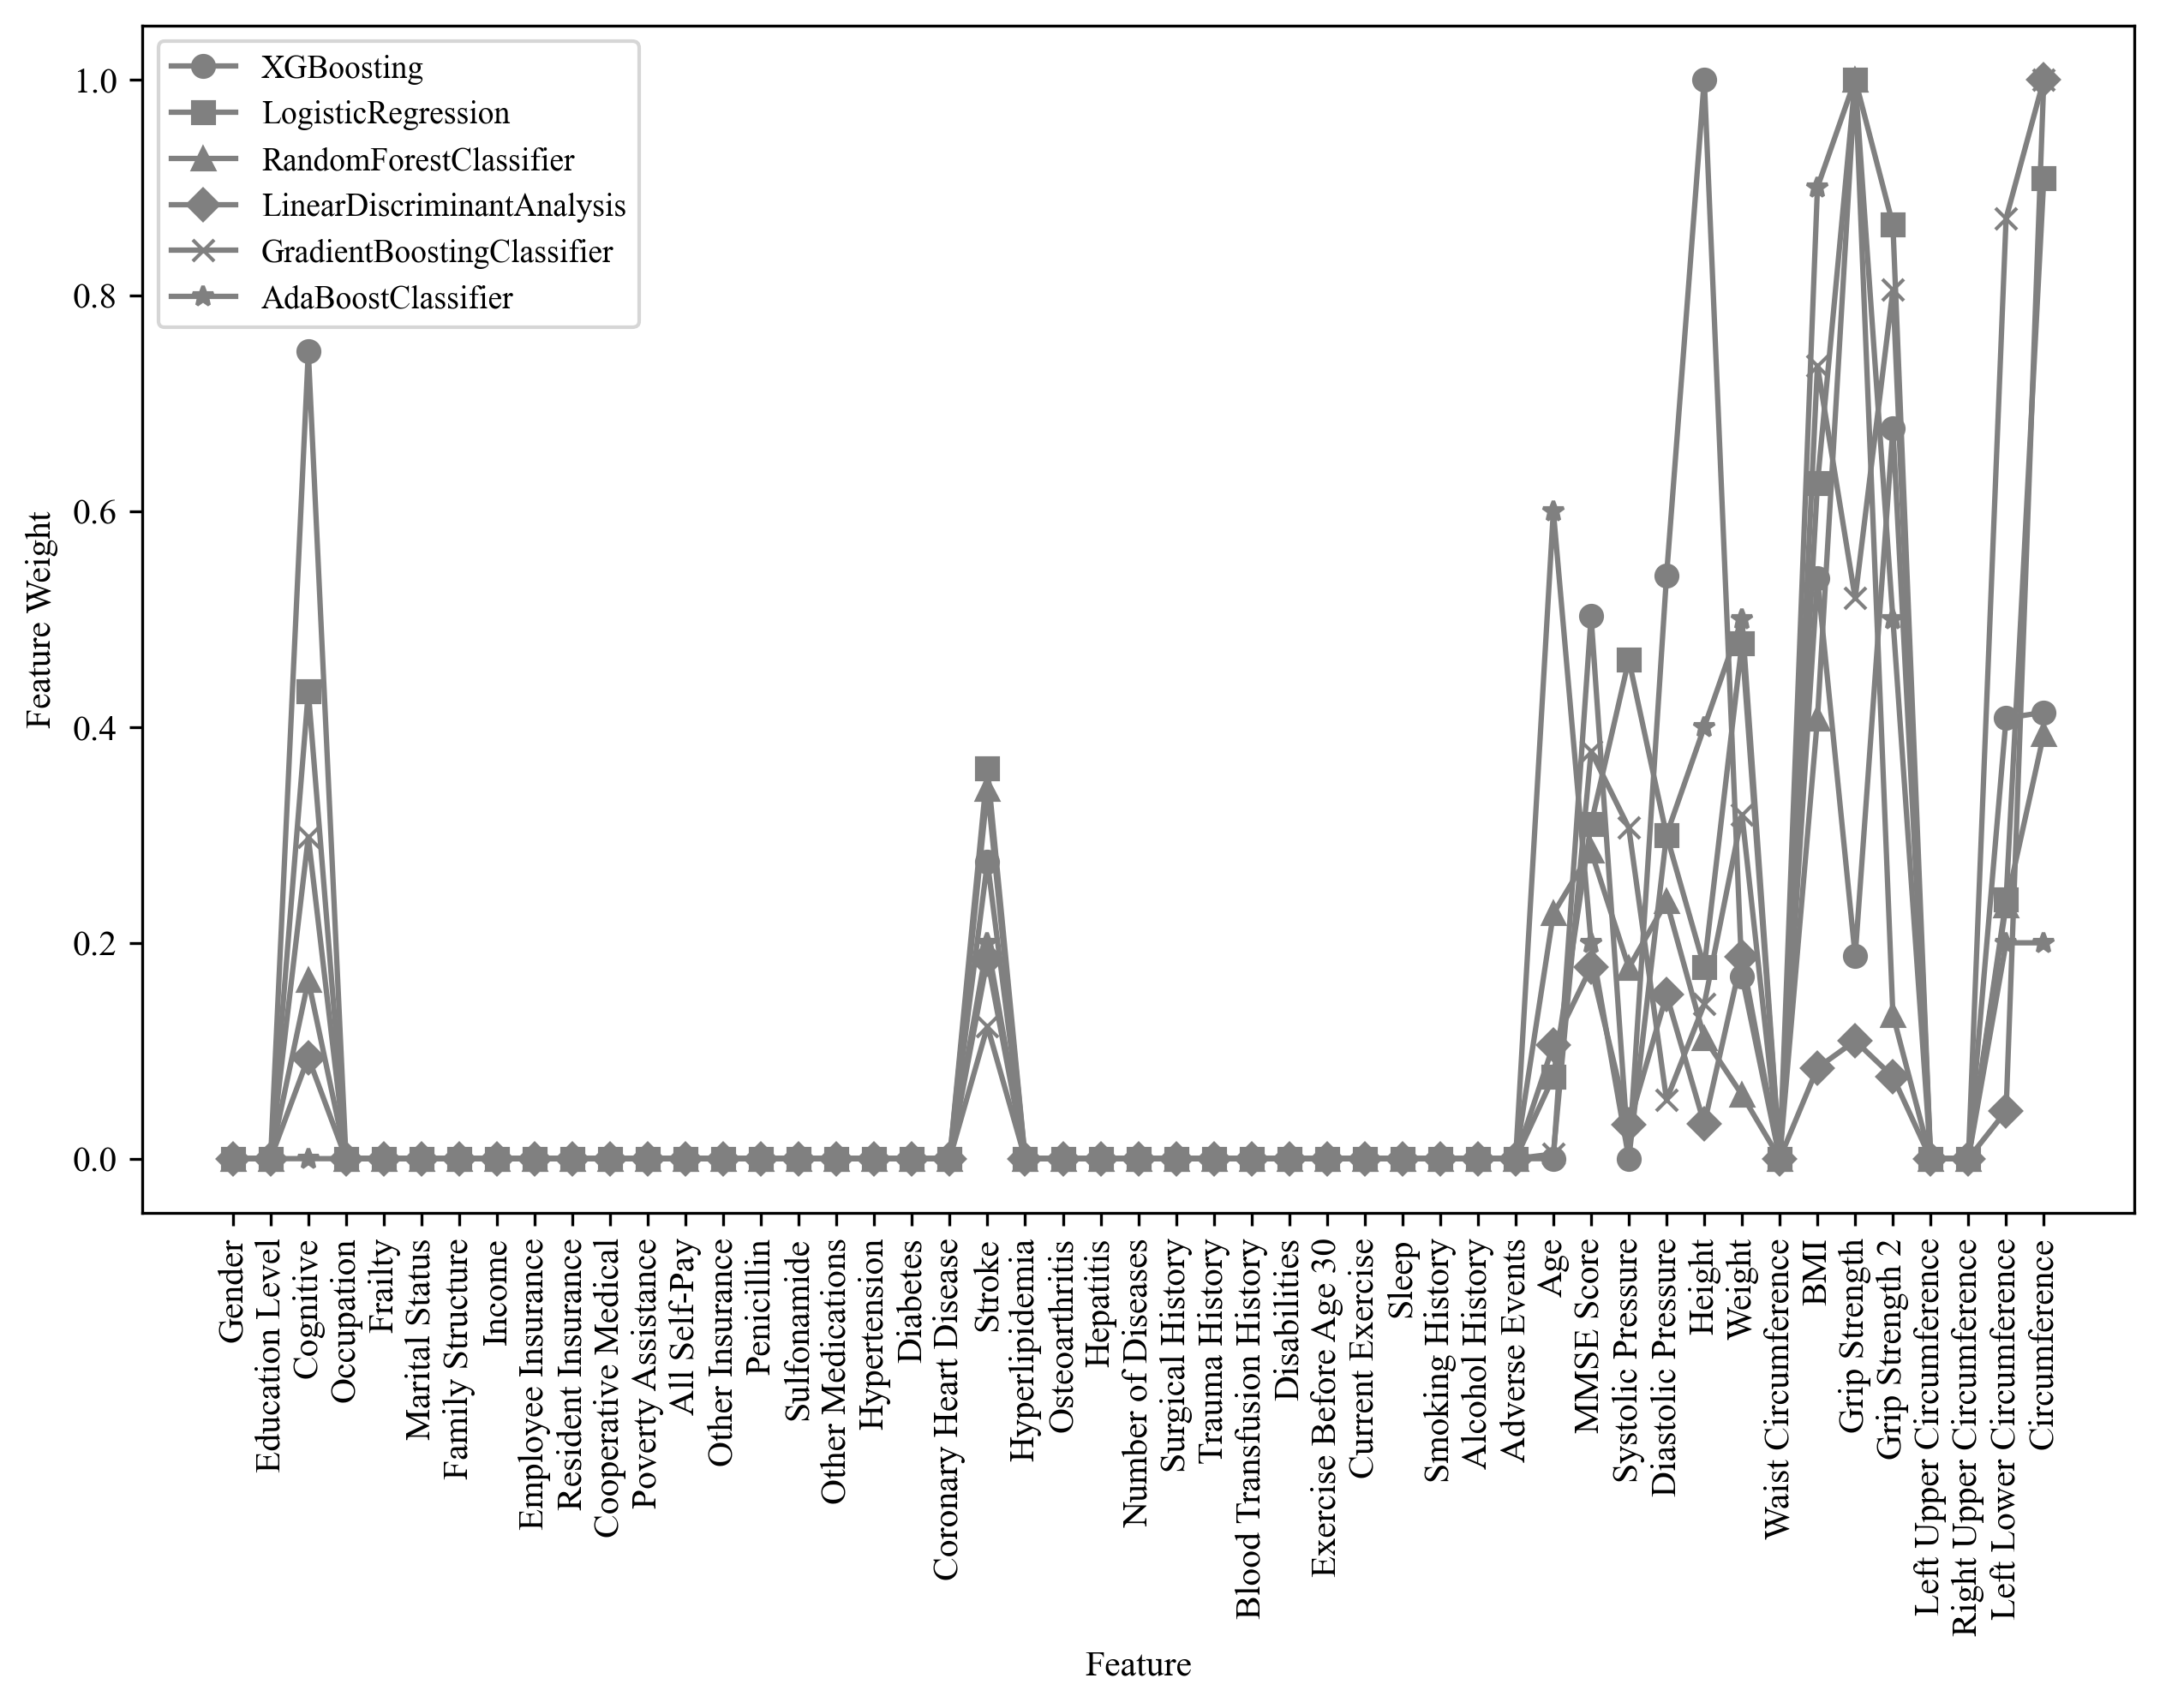

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

font2={'family':'Times New Roman', 
    'weight':'normal',
    'size':9
    }
# 归一化数据
scaler = MinMaxScaler()
use_feature[use_feature.columns[1:]] = scaler.fit_transform(use_feature[use_feature.columns[1:]])

# 创建平行坐标图
plt.figure(figsize=(10, 6),dpi=300)
markers = ['o', 's', '^', 'D', 'x', '*']  # 不同的标记形状

for i, classifier in enumerate(use_feature.columns[1:]):
    plt.plot(use_feature['feature'], use_feature[classifier], marker=markers[i], label=classifier, color='grey')

# 自定义图形属性
plt.xlabel('Feature', fontname='Times New Roman')
plt.ylabel('Feature Weight', fontname='Times New Roman')
plt.xticks(rotation=90, fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')
plt.legend(prop = font2)
plt.savefig("C:\\Users\\10634\\Desktop\\frailty\\英文\\汉族\\image\\feature_all_model_new.png")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
for feature_importance, name in zip(feature_importance_list, use_models_names):
    # 创建柱状图
    plt.figure(figsize=(6, 6), dpi=300)
    # 生成灰色渐变色
    n = len(feature_importance)
    colors = plt.cm.gray(np.linspace(0.1, 0.9, n))

    # 绘制特征权重条形图
    ax = plt.gca()
    plt.barh(feature_importance['feature'], feature_importance['importance'], color=colors)
    plt.xlabel('Feature Weight', fontdict={'family': 'Times New Roman'})
    plt.yticks(fontname='Times New Roman', fontsize=8)
    plt.gca().invert_yaxis()  # 反转y轴，以便高权重特征在顶部

    # 调整左边距
    ax.set_position([0.2, 0.1, 0.7, 0.8])  # 调整左边距来留出空间显示y刻度轴特征名字

    # 保存图像
    plt.savefig(f"C:\\Users\\10634\\Desktop\\frailty\\英文\\汉族\\image\\{name}_权重系数图.png")


In [152]:
use_feature_m = pd.DataFrame(m_df.columns)
use_feature_m.columns = ['feature']

for i, importance_m in enumerate(mon_feature_importance_list):
    suffix = f'_model_{i+1}'  # 创建后缀，以区分不同模型的列
    importance_m = importance_m.rename(columns={'importance': f'importance{suffix}'})
    use_feature_m = use_feature_m.merge(importance_m, on='feature', how='left')

use_feature_m.fillna(0,inplace=True)
use_feature_m.columns = columns
use_feature_m.to_csv("C:\\Users\\10634\\Desktop\\frailty\\英文\\蒙族\\feature_all_model.csv",encoding='utf-8-sig')

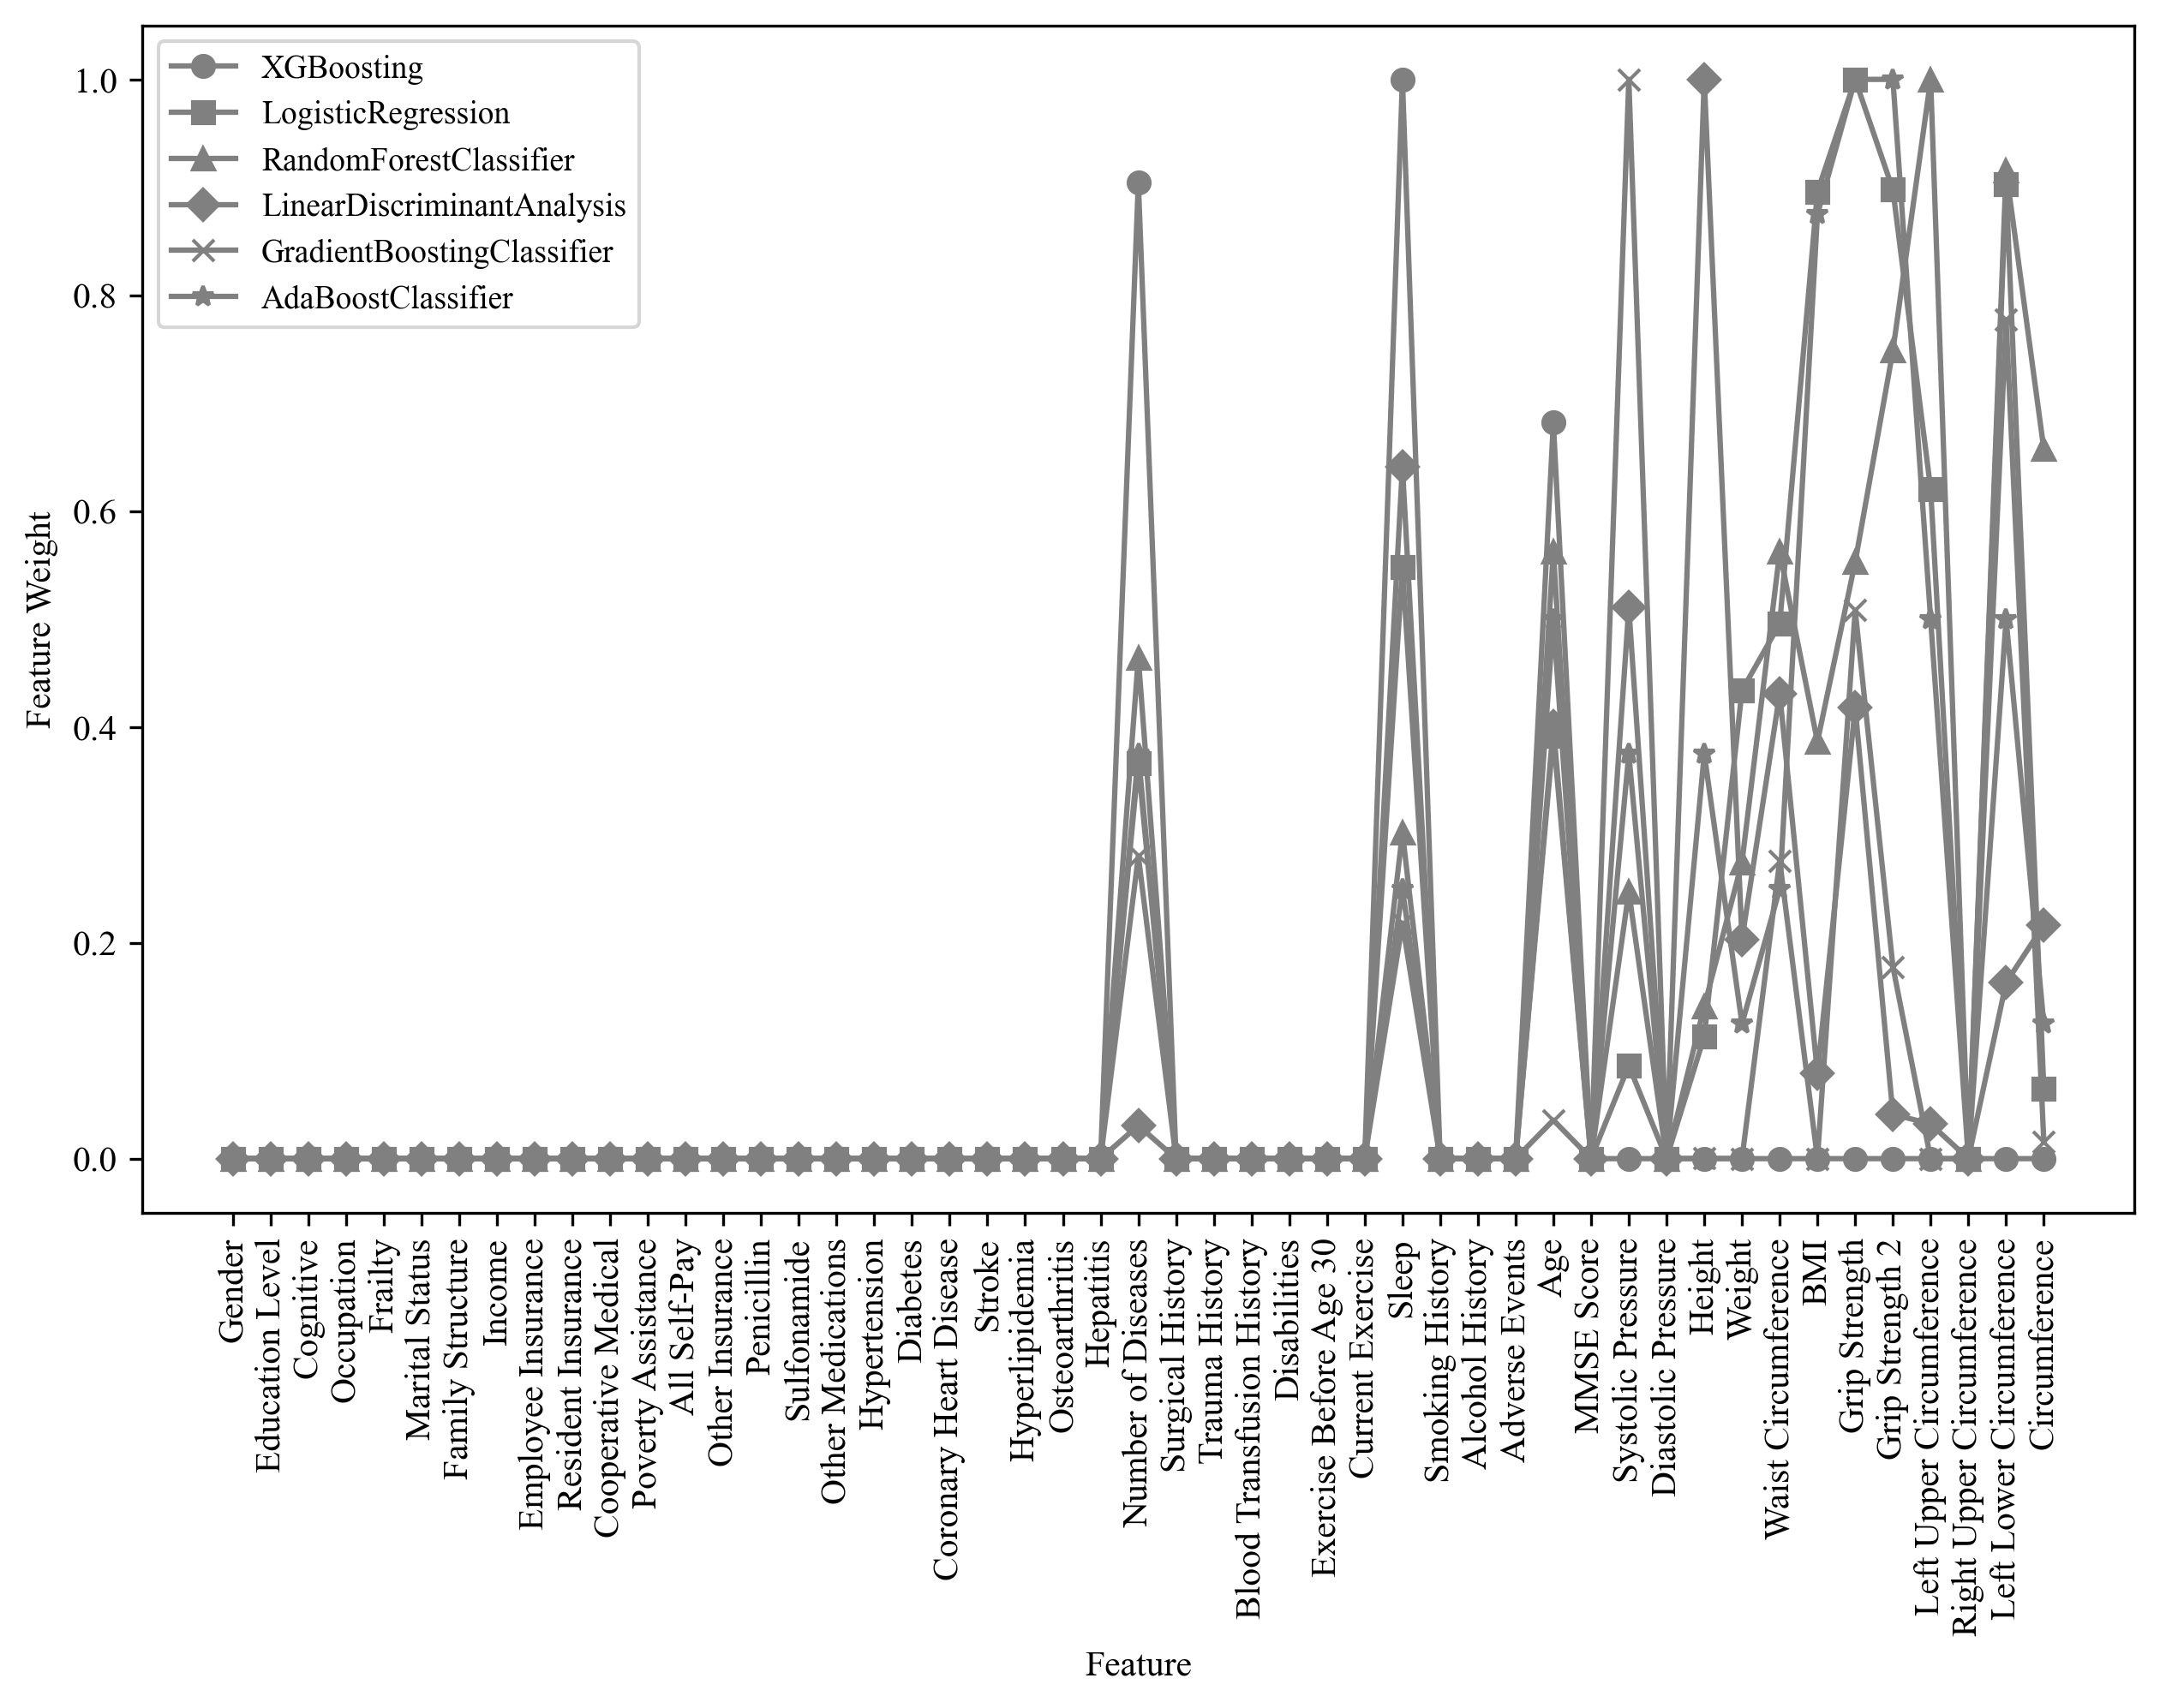

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

font2={'family':'Times New Roman', 
    'weight':'normal',
    'size':9
    }
# 归一化数据
scaler = MinMaxScaler()
use_feature_m[use_feature_m.columns[1:]] = scaler.fit_transform(use_feature_m[use_feature_m.columns[1:]])

# 创建平行坐标图
plt.figure(figsize=(10, 6),dpi=300)
markers = ['o', 's', '^', 'D', 'x', '*']  # 不同的标记形状

for i, classifier in enumerate(use_feature_m.columns[1:]):
    plt.plot(use_feature_m['feature'], use_feature_m[classifier], marker=markers[i], label=classifier, color='grey')

# 自定义图形属性
plt.xlabel('Feature', fontname='Times New Roman')
plt.ylabel('Feature Weight', fontname='Times New Roman')
plt.xticks(rotation=90, fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')
plt.legend(prop = font2)
plt.savefig("C:\\Users\\10634\\Desktop\\frailty\\英文\\蒙族\\image\\feature_all_model.png")
plt.show()


# 雷达图

In [100]:
feature_importance_list[0]

,feature,importance
0,Education Level,0.176469
1,Employee Insurance,0.112585
2,Cognitive,0.100135
3,Family Structure,0.094375
4,Diabetes,0.089902
5,Gender,0.080690
6,Number of Diseases,0.063064
7,Income,0.060852
8,Resident Insurance,0.059442
9,Occupation,0.049663


In [101]:
mon_feature_importance_list[0]

,feature,importance
0,BMI,0.110821
1,Left Lower Circumference,0.061028
2,Diabetes,0.056977
3,Employee Insurance,0.054665
4,Age,0.046352
5,Grip Strength,0.042620
6,Circumference,0.038715
7,Income,0.023997
8,Height,0.021925
9,Grip Strength 2,0.014380


In [153]:
import pandas as pd


# 使用merge函数合并两个数据框，按照'特征名称'列进行合并
merged_df = pd.merge(feature_importance_list[1], mon_feature_importance_list[1], on='feature', how='inner')

# 打印合并后的数据框
merged_df.columns = ['feature','Han','Monglia']
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
merged_df_scaler = s.fit_transform(merged_df.iloc[:,1:])
merged_df = pd.concat([merged_df['feature'],pd.DataFrame(merged_df_scaler)],axis=1)
merged_df.columns = ['feature','Han','Monglia']


In [149]:
merged_df

,feature,Han,Monglia
0,Grip Strength,1.000000,0.075568
1,Weight,0.167751,0.018359
2,BMI,0.163115,0.199753
3,Height,0.103080,1.000000
4,Age,0.072637,0.173586
5,Employee Insurance,0.067396,0.000000
6,Hepatitis,0.029869,0.207554
7,Income,0.018046,0.121452
8,Waist Circumference,0.007630,0.054769
9,Diabetes,0.000000,0.675338


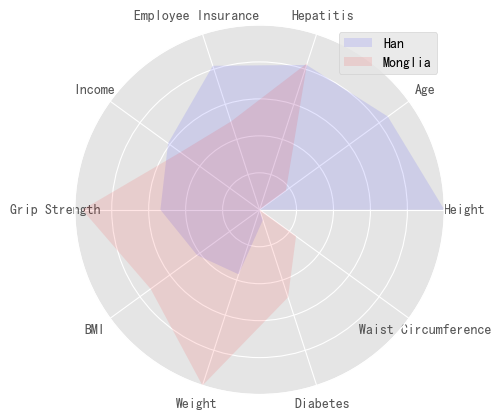

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'SimHei'
#用于正常显示符号
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

# 特征名称和特征权重列
features = merged_df['feature'].tolist()
weights1 = merged_df['Han'].tolist()
weights2 = merged_df['Monglia'].tolist()

# 创建一个角度列表，将雷达图均匀分成多个部分，确保数量与特征数量相同
num_features = len(features)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()

# 拼接数据首尾，使图形中线条封闭
weights1=np.concatenate((weights1,[weights1[0]]))
weights2=np.concatenate((weights2,[weights2[0]]))
angles=np.concatenate((angles,[angles[0]]))
# 创建雷达图
fig, ax = plt.subplots(subplot_kw={'polar': True})

# 绘制特征1的数据
ax.fill(angles, weights1, 'b', alpha=0.1, label='Han')
ax.set_yticklabels([])  # 隐藏刻度标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)

ax.set_ylim(0,1)
# 绘制特征2的数据
ax.fill(angles, weights2, 'r', alpha=0.1, label='Monglia')

# 添加图例
plt.legend(loc='upper right')

# 显示雷达图
plt.show()
